In [1]:
# !pip install xgboost

In [2]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
from statsmodels.stats.outliers_influence import variance_inflation_factor
rcParams['figure.figsize'] = (12,6)
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, auc, roc_auc_score
import sklearn.metrics as metrics
import statistics
from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings('ignore')

In [3]:
telecommunications_data = pd.read_csv('data/telecommunications_churn.csv')

In [4]:
telecommunications_data.head(11)

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.10,197.40,244.70,10.00,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.60,195.50,254.40,13.70,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.40,121.20,162.60,12.20,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.40,61.90,196.90,6.60,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.70,148.30,186.90,10.10,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
5,118,0,0,223.40,220.60,203.90,6.30,0,1,98,37.98,101,18.75,118,9.18,6,1.70,67.61,0
6,121,1,24,218.20,348.50,212.60,7.50,3,0,88,37.09,108,29.62,118,9.57,7,2.03,78.31,0
7,147,0,0,157.00,103.10,211.80,7.10,0,1,79,26.69,94,8.76,96,9.53,6,1.92,46.90,0
8,117,0,0,184.50,351.60,215.80,8.70,1,0,97,31.37,80,29.89,90,9.71,4,2.35,73.32,0
9,141,1,37,258.60,222.00,326.40,11.20,0,1,84,43.96,111,18.87,97,14.69,5,3.02,80.54,0


In [5]:
telecommunications_data.tail(5)

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
3328,192,1,36,156.20,215.50,279.10,9.90,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.10,153.40,191.30,9.60,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.80,288.80,191.90,14.10,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.80,159.60,139.20,5.00,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0
3332,74,1,25,234.40,265.90,241.40,13.70,0,0,113,39.85,82,22.60,77,10.86,4,3.70,77.01,0


In [6]:
# Find Shape
telecommunications_data.shape

(3333, 19)

In [7]:
telecommunications_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

#### Insights:
1. 19 Features available with 3333 rows
2. All the features not containg any null values
3. All the features have correct data types, ie no need for datatype convertion

In [8]:
# Find Summary
telecommunications_data.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,"3,333.00","3,333.00","3,333.00","3,333.00","3,333.00","3,333.00","3,333.00","3,333.00","3,333.00","3,333.00","3,333.00","3,333.00","3,333.00","3,333.00","3,333.00","3,333.00","3,333.00","3,333.00","3,333.00"
mean,101.06,0.28,8.10,179.78,200.98,200.87,10.24,1.56,0.10,100.44,30.56,100.11,17.08,100.11,9.04,4.48,2.76,59.45,0.14
std,39.82,0.45,13.69,54.47,50.71,50.57,2.79,1.32,0.30,20.07,9.26,19.92,4.31,19.57,2.28,2.46,0.75,10.50,0.35
min,1.00,0.00,0.00,0.00,0.00,23.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.00,1.04,0.00,0.00,22.93,0.00
25%,74.00,0.00,0.00,143.70,166.60,167.00,8.50,1.00,0.00,87.00,24.43,87.00,14.16,87.00,7.52,3.00,2.30,52.38,0.00
50%,101.00,0.00,0.00,179.40,201.40,201.20,10.30,1.00,0.00,101.00,30.50,100.00,17.12,100.00,9.05,4.00,2.78,59.47,0.00
75%,127.00,1.00,20.00,216.40,235.30,235.30,12.10,2.00,0.00,114.00,36.79,114.00,20.00,113.00,10.59,6.00,3.27,66.48,0.00
max,243.00,1.00,51.00,350.80,363.70,395.00,20.00,9.00,1.00,165.00,59.64,170.00,30.91,175.00,17.77,20.00,5.40,96.15,1.00


#### Insights:
1. This Provider have  customers who has active with maximum 243 days and 1 day as minimum
2. less than 75% customers not using voice mail plan
3. Customers having more calls in Nights compare to day and evening, ie Day charge and evening charge are high as compared to night charge
4. 75% customers getting only 2 customer service calls monthly, ie customer service is poor
5. average day/evening/night calls are 100
6. Charge starts from 23rs as minimum
7. dataset contains outliers
8. more than 75%  customers is not using international plans

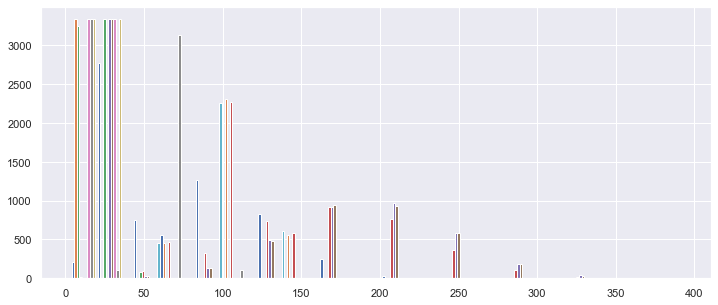

In [9]:
def hist_plot(df):
    plt.figure(figsize=(12,5))
    plt.hist(df)
    return plt.show()
hist_plot(telecommunications_data)

In [10]:
# Check data is normalized or not
# def dist_plot(df):
#     plt.figure(figsize=(16,20))
#     for i,col in enumerate(df.columns):
#         plt.subplot(5,4,i+1)
#         sns.distplot(df[col])
#     return plt.show()
# dist_plot(telecommunications_data.drop(columns=["churn"]))

#### Insights:
1. Data is not noramlly distributed. so will use standard scalar conversion while splitting data
2. We can find there is positive skeness in the data

In [11]:
# Find Missing values counts 
telecommunications_data.isna().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

#### Not contains  missing values

In [12]:
# Find Duplicate Values
telecommunications_data.duplicated().sum()

0

#### No Duplicate values

In [13]:
#Find Unique Values
print(f'Voice Mail Plan: {telecommunications_data["voice_mail_plan"].unique()}')
print(f'Customer Service Calls: {telecommunications_data["customer_service_calls"].unique()}')
print(f'International Plan: {telecommunications_data["international_plan"].unique()}')
print(f'Churn: {telecommunications_data["churn"].unique()}')

Voice Mail Plan: [1 0]
Customer Service Calls: [1 0 2 3 4 5 7 9 6 8]
International Plan: [0 1]
Churn: [0 1]


In [14]:
def pie_plot(df,ylabel):
    colors = ['#ADD8E6', '#89CFF0']
    plt.rcParams.update({'text.color' : "black"})
    labels = 'No', 'Yes'
    plt.figure(figsize = (12,5))
    ax = ((df.value_counts()/len(df))*100).plot.pie(labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors = colors)
    ax.set_ylabel(ylabel,fontsize = 12)
    ax.axis('equal') 
    return plt.show()


In [15]:
telecommunications_data['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

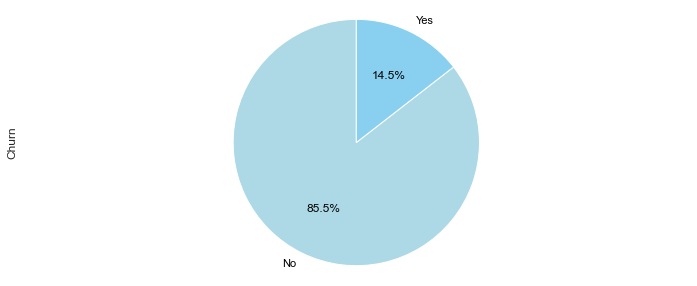

In [16]:
pie_plot(telecommunications_data['churn'],'Churn')

#### Insight:
1 In the above output, we can see that our dataset is not balanced at all i.e. Yes is 14.5% around and No is 85.5% around

In [17]:
telecommunications_data['international_plan'].value_counts()

0    3010
1     323
Name: international_plan, dtype: int64

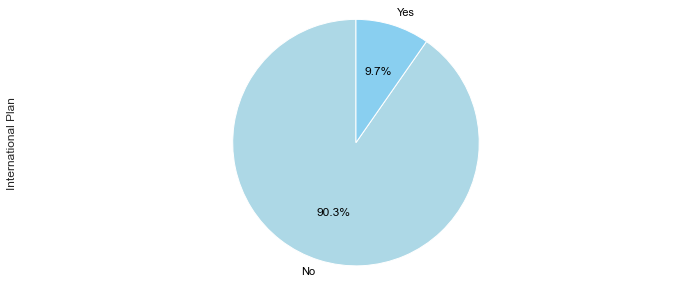

In [18]:
pie_plot(telecommunications_data['international_plan'],'International Plan')

#### Insights:
1. We can see that 90.3% customers is not using international plan

In [19]:
telecommunications_data['voice_mail_plan'].value_counts()

0    2411
1     922
Name: voice_mail_plan, dtype: int64

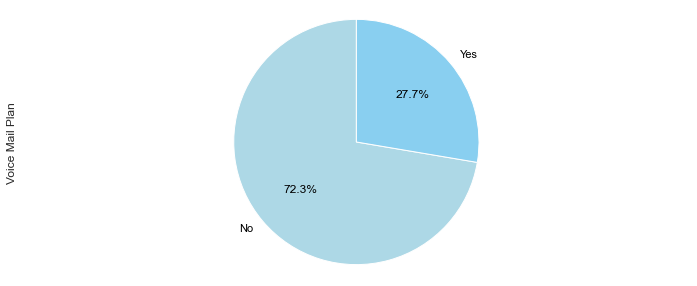

In [20]:
pie_plot(telecommunications_data['voice_mail_plan'],'Voice Mail Plan')

#### Insights:
1.72.3% Customers is not using voice mail plan

### EDA & Visualization

In [21]:
telco_data = telecommunications_data.copy()
titles = ['Account Length','Voice Mail Plan','Voice Mail Messages','Day Mins','Evening Mins','Night Mins','International Mins','Customer Service Calls','International Plan','Day Calls','Day Charges','Evening Calls','Evening Charges','Night Calls','Night Charges','International Calls','International Charges','Total Charge']

#### Checking Outliers

In [22]:
# Check Outliers
def box_plot(df):
    plt.figure(figsize=(16, 16))
    plt.subplots_adjust(hspace=0.5)
    for i,col in enumerate(df.columns):
        ax = plt.subplot(5, 4, i + 1)
        sns.boxplot(data=df, x=col,ax=ax)
        ax.set_xlabel(col)
    return plt.show()

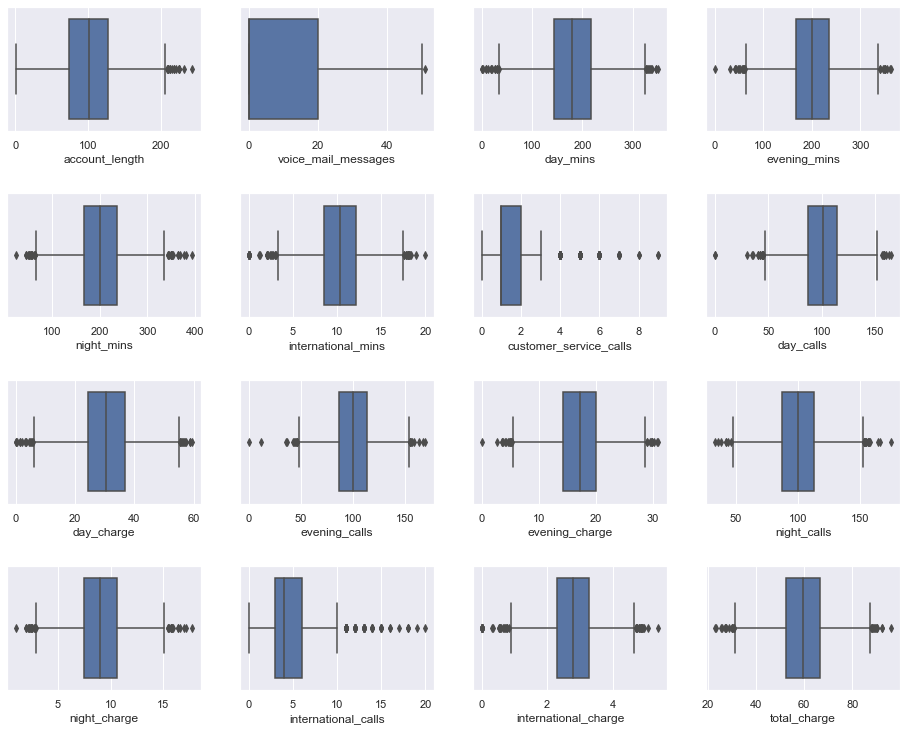

In [23]:
drop_features=["churn","voice_mail_plan","international_plan"]
box_plot(telco_data.drop(columns=drop_features))

In [24]:
# Using IQR method
def check_outliers(df):
    result_outliers = []
    result_max_outliers = []
    result_min_outliers = []
    result_outliers_is_exist = []
    result_mean = []
    churn_rate = []
    features = df.drop(columns=drop_features).columns
    for i,col in enumerate(features):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[col][((df[col]<(Q1-1.5*IQR)) | (df[col]>(Q3+1.5*IQR)))]
        result_outliers_is_exist.append(((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).any())
        result_outliers.append(len(outliers))
        churn_rate.append(len(df[df.index.isin(outliers.index) & df.churn ==1]["churn"]))
    #         result_max_outliers.append(outliers.max())
    #         result_min_outliers.append(outliers.min())
    #         result_mean.append(df[col].mean())
    data = {'Feature':features,'is Exist Outlier':result_outliers_is_exist,'Total Outliers':result_outliers,"Churned":churn_rate}
    result_df = pd.DataFrame(data)
    return result_df

In [25]:
outliers = check_outliers(telco_data)
outliers

,Feature,is Exist Outlier,Total Outliers,Churned
0,account_length,True,18,5
1,voice_mail_messages,True,1,0
2,day_mins,True,25,12
3,evening_mins,True,24,5
4,night_mins,True,30,2
5,international_mins,True,46,5
6,customer_service_calls,True,267,138
7,day_calls,True,23,7
8,day_charge,True,25,12
9,evening_calls,True,20,2


### Outliers Present

#### Remove Outliers

In [26]:
# Cap the Outliers
def capping_outliers(df):
    new_df_cap = df.copy()
    for i,col in enumerate(df):
        
        percentile25 = df[col].quantile(0.25)
        percentile75 = df[col].quantile(0.75)
        iqr = percentile75 - percentile25
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr
        if col not in  drop_features:
            new_df_cap[col] = np.where(
                new_df_cap[col] > upper_limit,
                upper_limit,
                np.where(
                    new_df_cap[col] < lower_limit,
                    lower_limit,
                    new_df_cap[col]
                )
            )
    return new_df_cap


In [27]:
outliers_df = capping_outliers(telco_data)
outliers_df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128.00,1,25.00,265.10,197.40,244.70,10.00,1.00,0,110.00,45.07,99.00,16.78,91.00,11.01,3.00,2.70,75.56,0
1,107.00,1,26.00,161.60,195.50,254.40,13.70,1.00,0,123.00,27.47,103.00,16.62,103.00,11.45,3.00,3.70,59.24,0
2,137.00,0,0.00,243.40,121.20,162.60,12.20,0.00,0,114.00,41.38,110.00,10.30,104.00,7.32,5.00,3.29,62.29,0
3,84.00,0,0.00,299.40,63.55,196.90,6.60,2.00,1,71.00,50.90,88.00,5.40,89.00,8.86,7.00,1.78,66.80,0
4,75.00,0,0.00,166.70,148.30,186.90,10.10,3.00,1,113.00,28.34,122.00,12.61,121.00,8.41,3.00,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192.00,1,36.00,156.20,215.50,279.10,9.90,2.00,0,77.00,26.55,126.00,18.32,83.00,12.56,6.00,2.67,60.10,0
3329,68.00,0,0.00,231.10,153.40,191.30,9.60,3.00,0,57.00,39.29,55.00,13.04,123.00,8.61,4.00,2.59,63.53,0
3330,28.00,0,0.00,180.80,288.80,191.90,14.10,2.00,0,109.00,30.74,58.00,24.55,91.00,8.64,6.00,3.81,67.74,0
3331,184.00,0,0.00,213.80,159.60,139.20,5.00,2.00,1,105.00,36.35,84.00,13.57,137.00,6.26,10.00,1.35,57.53,0


In [28]:
outliers = check_outliers(outliers_df)
outliers = outliers.drop(columns=["Churned"])
outliers

,Feature,is Exist Outlier,Total Outliers
0,account_length,False,0
1,voice_mail_messages,False,0
2,day_mins,False,0
3,evening_mins,False,0
4,night_mins,False,0
5,international_mins,False,0
6,customer_service_calls,False,0
7,day_calls,False,0
8,day_charge,False,0
9,evening_calls,False,0


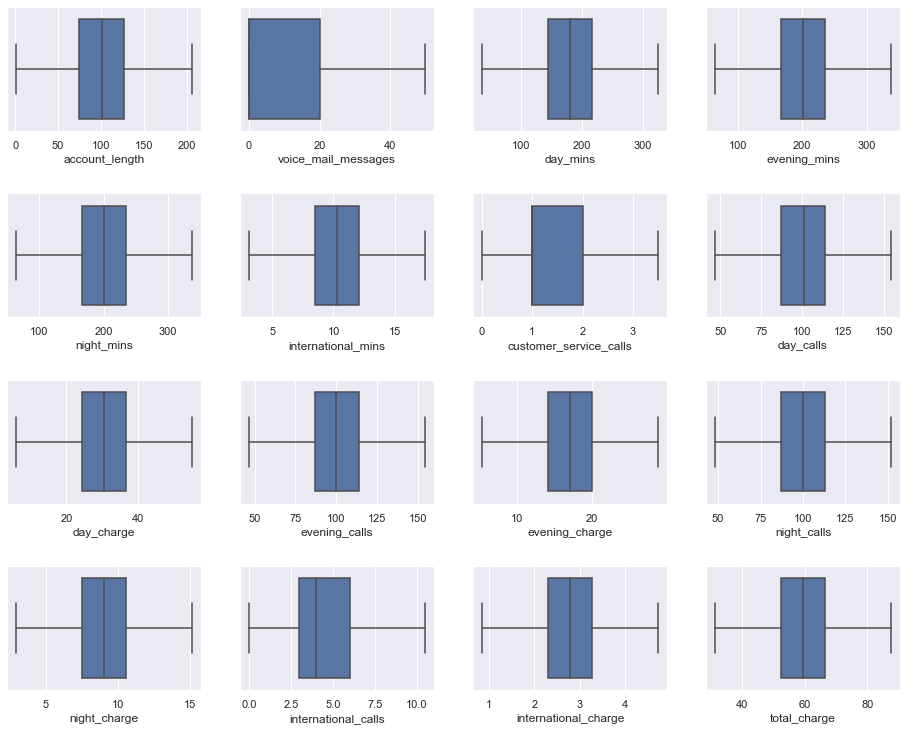

In [29]:
box_plot(outliers_df.drop(columns=drop_features))

### Checking Correlation

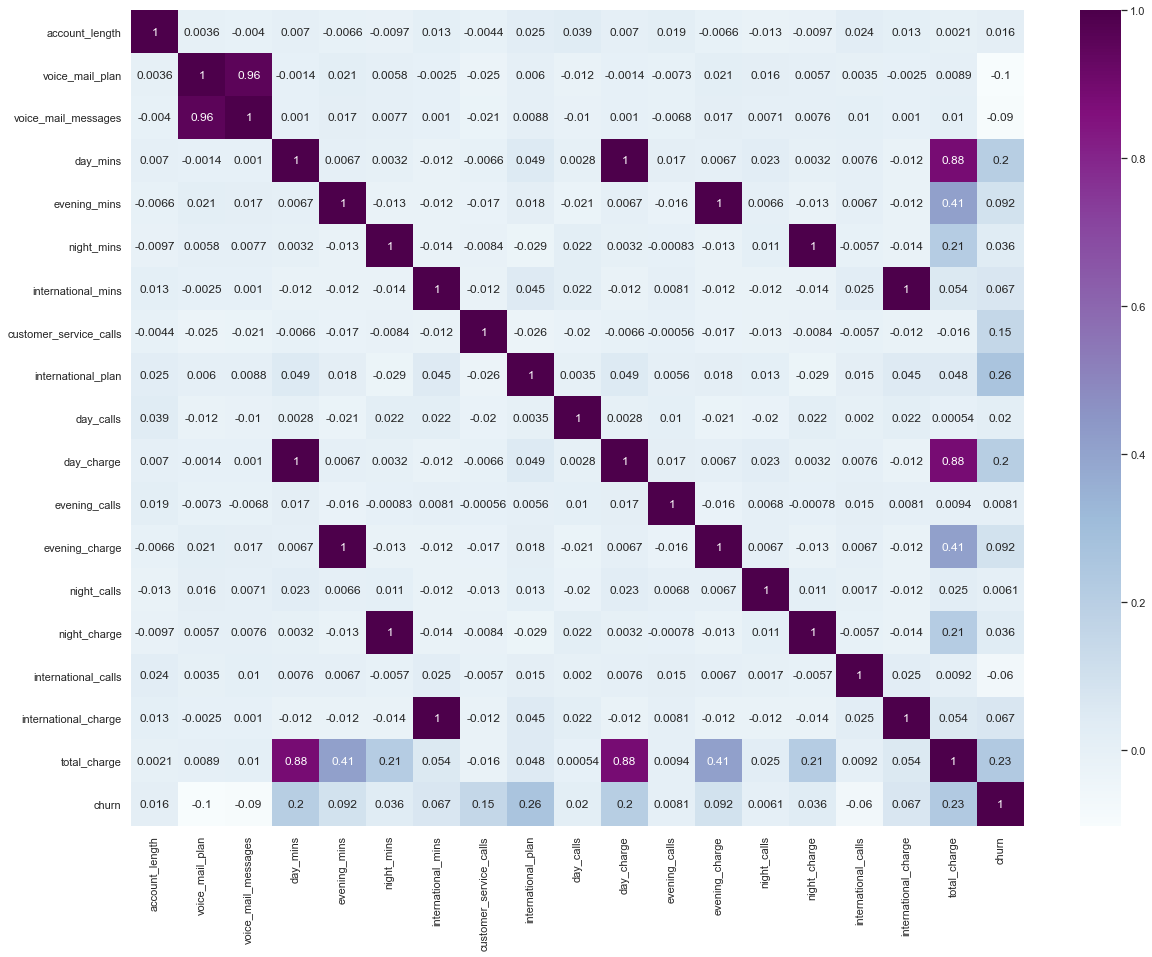

In [30]:
plt.figure(figsize=(20,15))
sns.set(style="white")
sns.heatmap(outliers_df.corr(),annot=True,cmap="BuPu" )
plt.show()

Most Positive Correlations: 
 international_plan       0.26
total_charge             0.23
day_charge               0.20
day_mins                 0.20
customer_service_calls   0.15
evening_mins             0.09
evening_charge           0.09
international_charge     0.07
international_mins       0.07
night_charge             0.04
night_mins               0.04
day_calls                0.02
account_length           0.02
evening_calls            0.01
night_calls              0.01
dtype: float64

Most Negative Correlations: 
 international_calls   -0.06
voice_mail_messages   -0.09
voice_mail_plan       -0.10
dtype: float64


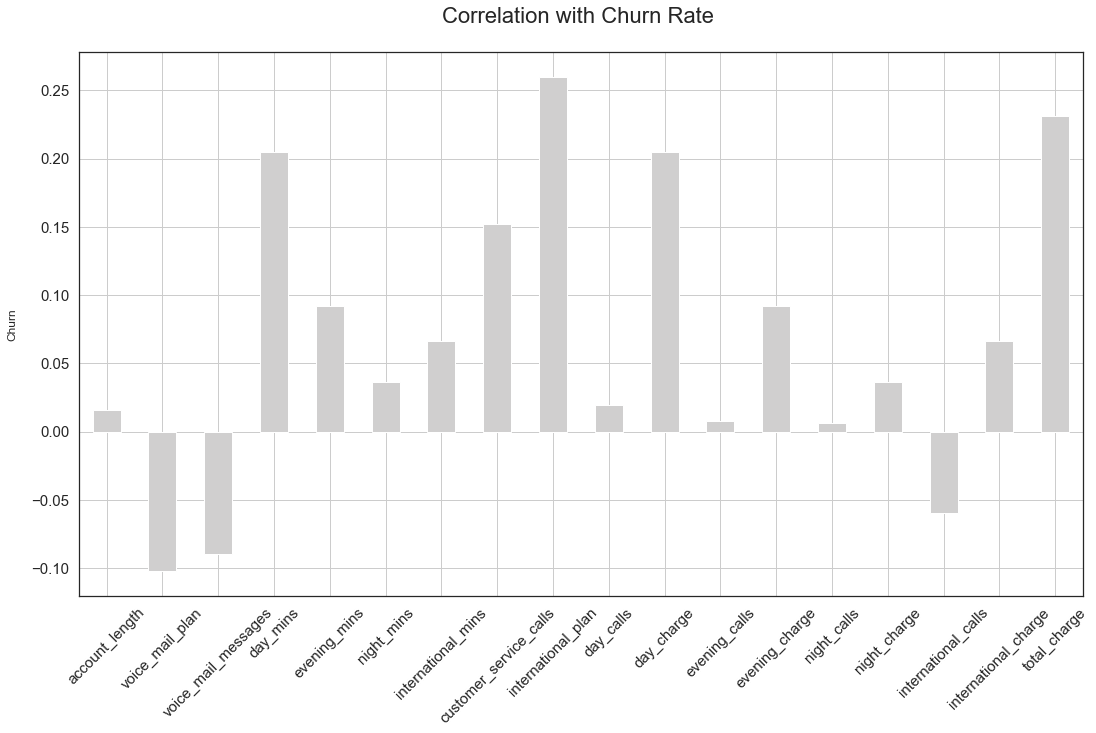

In [31]:
# Find Positive/Negative Correlations
correlations = outliers_df.corrwith(telco_data.churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#D0CFCF',
        rot = 45, grid = True)
plt.ylabel("Churn", labelpad=14)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
print('Most Positive Correlations: \n', positive_correlations.sort_values(ascending=False))
print('\nMost Negative Correlations: \n', negative_correlations.sort_values(ascending=False))

#### Insights
1. between Voice Mail plan and Voice mail messages have highly coorelation
2. between day mins and day charge, eveening min and evening charge, night min and night charge have hight coorelation
3. between daycharge,evening charge,and total charge  have high coorelation.

In [32]:
dummy_df = outliers_df.copy()
dummy_df["churn"] = telco_data["churn"]

In [33]:
def count_plot(df,col_x,hue):
    ax = sns.countplot(data = df, x = col_x, hue = hue)
    ax.set_ylabel('Customers')
    ax.set_xlabel(col_x.replace("_"," "))
    ax.set_title('%s by %s'% (col_x.replace("_"," "),hue))
    ax.legend(["No","Yes"],loc='upper right')
    plt.show()

### Plotting features against churn

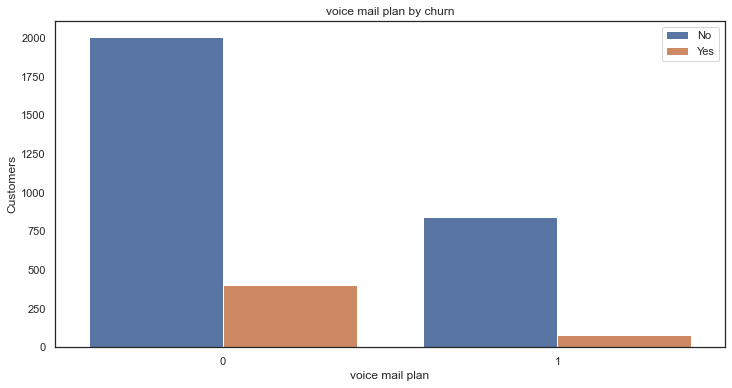

In [34]:
count_plot(dummy_df,col_x='voice_mail_plan',hue='churn')

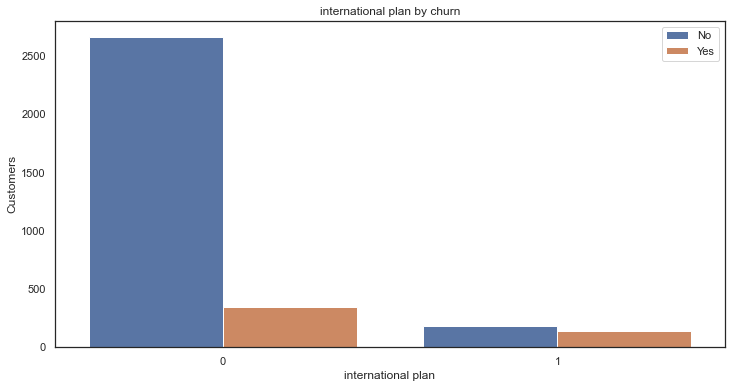

In [35]:
count_plot(dummy_df,col_x='international_plan',hue='churn')

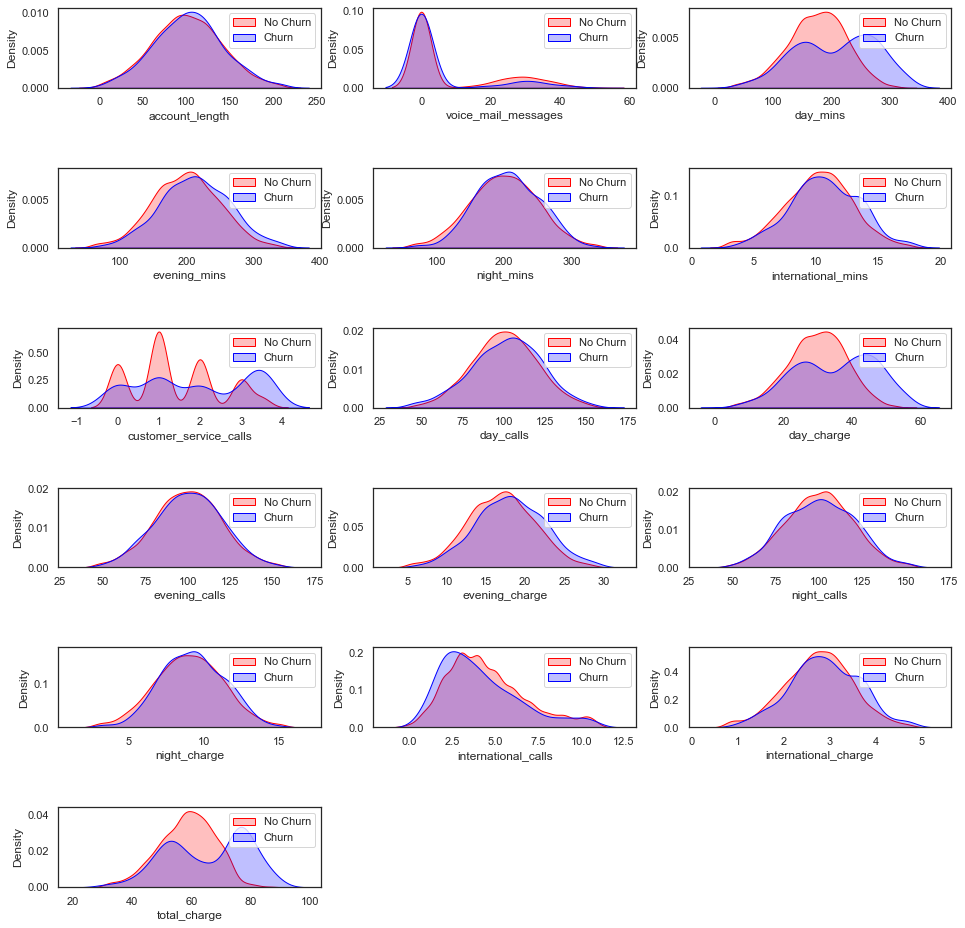

In [36]:
def kde_plot(y,columns,df):
    plt.figure(figsize=(16, 25))
    plt.subplots_adjust(hspace=1)
    for i,x in enumerate(columns):
        ax = plt.subplot(9, 3, i + 1)
        sns.kdeplot(df[x][(df[y] == 0) ],
                color="Red", shade = True)
        sns.kdeplot(df[x][(df[y] == 1) ],
                    ax =ax, color="Blue", shade= True)
        ax.legend(["No Churn","Churn"],loc='upper right')
        ax.set_ylabel("Density")
    return plt.show()
kde_plot("churn",dummy_df.drop(columns=['churn','international_plan','voice_mail_plan']).columns,dummy_df)

### Insight: Here it is evident that when the churn is high then
#### 1. Account length are high.
#### 2. Voice Mail plan are low.
#### 3. Voice Mail Messages are low.
#### 4. Customer Service are Low.
#### 5. International plan are low.
#### 6. Day Charges are High.
#### 7. Evening charges are High.
#### 8. Nights Charges are High.
#### 9. Day Calls are High.
#### 10. Evening Calls are High.
#### 11. Nights Calls are High.
#### 12. International Calls are low.
#### 13. International Chrages are High.
#### 14. Total Chrages are High.

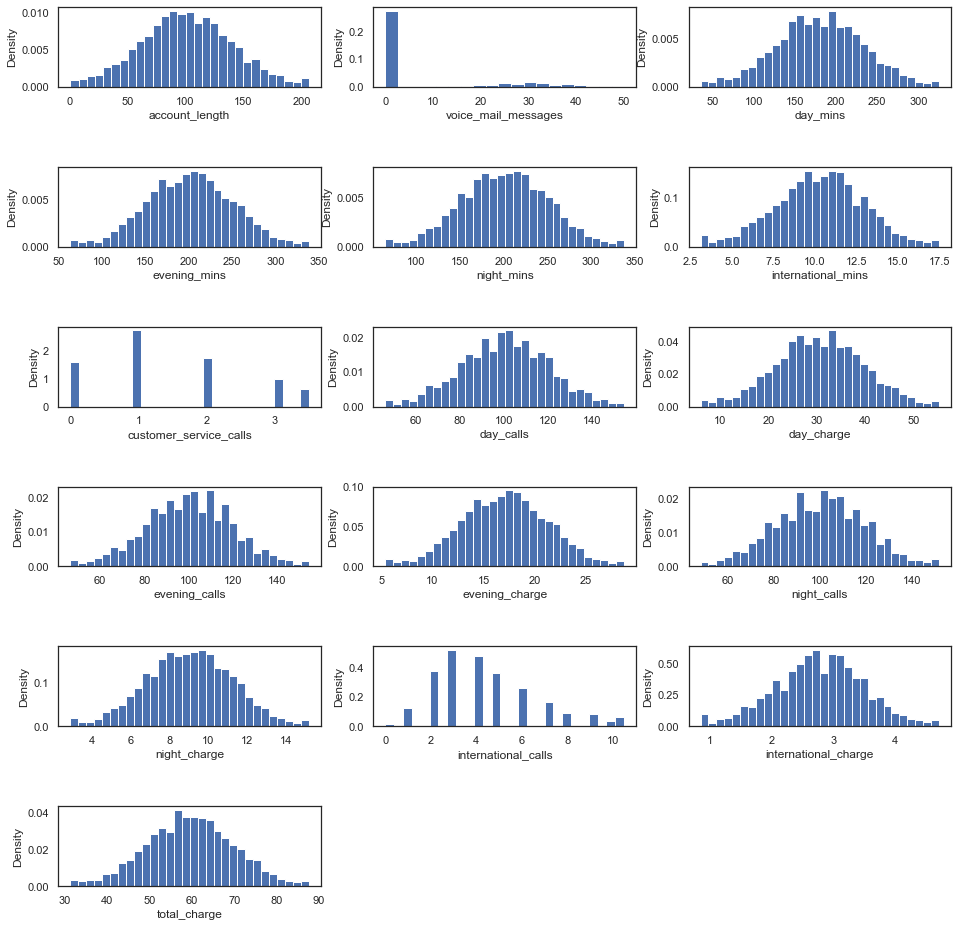

In [37]:
def feature_normality_check(df):
    plt.figure(figsize=(16, 25))
    plt.subplots_adjust(hspace=1)
    for i,col in enumerate(df.columns):
        ax = plt.subplot(9, 3, i + 1)
        ax.hist(df[col], bins='auto', density=True)
        ax.set_ylabel("Density")
        ax.set_xlabel(col)
    return plt.show()
feature_normality_check(dummy_df.drop(columns=['churn','international_plan','voice_mail_plan']))

### Most of the features are normally distributed

#### Dropping High Coorelated features

In [38]:
# Dropping High Coorelated features
cor_matrix = dummy_df.drop(columns=['churn']).corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
to_drop

['voice_mail_messages',
 'day_charge',
 'evening_charge',
 'night_charge',
 'international_charge']

In [39]:
final_df = dummy_df.drop(columns=to_drop, axis=1).copy()
final_df

,account_length,voice_mail_plan,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,evening_calls,night_calls,international_calls,total_charge,churn
0,128.00,1,265.10,197.40,244.70,10.00,1.00,0,110.00,99.00,91.00,3.00,75.56,0
1,107.00,1,161.60,195.50,254.40,13.70,1.00,0,123.00,103.00,103.00,3.00,59.24,0
2,137.00,0,243.40,121.20,162.60,12.20,0.00,0,114.00,110.00,104.00,5.00,62.29,0
3,84.00,0,299.40,63.55,196.90,6.60,2.00,1,71.00,88.00,89.00,7.00,66.80,0
4,75.00,0,166.70,148.30,186.90,10.10,3.00,1,113.00,122.00,121.00,3.00,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192.00,1,156.20,215.50,279.10,9.90,2.00,0,77.00,126.00,83.00,6.00,60.10,0
3329,68.00,0,231.10,153.40,191.30,9.60,3.00,0,57.00,55.00,123.00,4.00,63.53,0
3330,28.00,0,180.80,288.80,191.90,14.10,2.00,0,109.00,58.00,91.00,6.00,67.74,0
3331,184.00,0,213.80,159.60,139.20,5.00,2.00,1,105.00,84.00,137.00,10.00,57.53,0


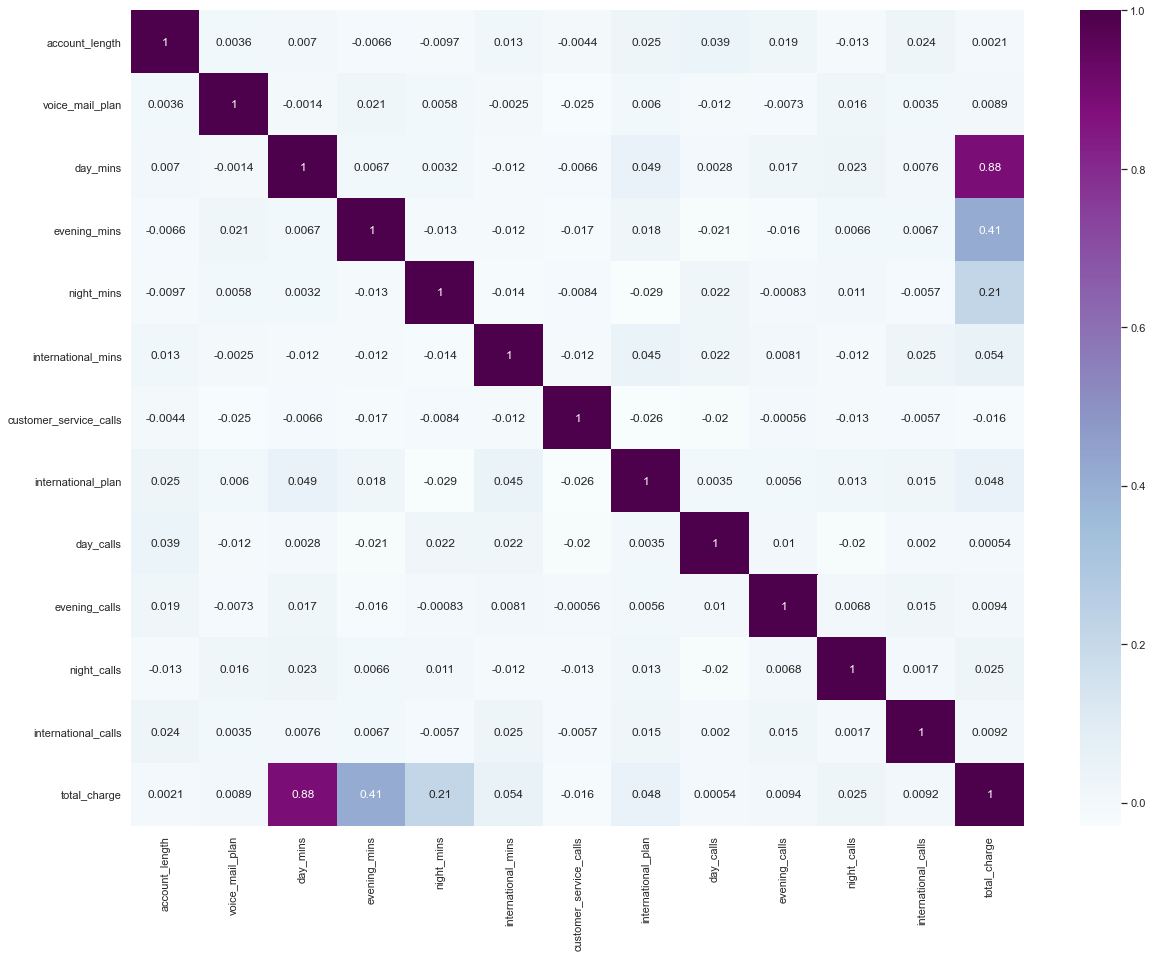

In [40]:
plt.figure(figsize=(20,15))
sns.set(style="white")
sns.heatmap(final_df.drop(columns=["churn"]).corr(),annot=True,cmap="BuPu" )
plt.show()

### Feature Selection

In [41]:
from sklearn.feature_selection import SelectKBest,SelectPercentile,mutual_info_classif,f_classif

In [42]:
# Mutual Information Statistics.
x= final_df.iloc[:,:13]
y = final_df.iloc[:,-1].values.reshape(-1,1)
feature_columns = final_df.iloc[:,:13].columns
selector = SelectKBest(mutual_info_classif,k="all")
selector.fit_transform(x,y)
stats_score = []
for i in range(len(selector.scores_)):
    stats_score.append(selector.scores_[i])
mutual_info_classif_scores = pd.DataFrame({"features":feature_columns,"mutual_info_classif_scores":stats_score}).sort_values(by="mutual_info_classif_scores",ascending=False)
mutual_info_classif_scores

,features,mutual_info_classif_scores
12,total_charge,0.11
2,day_mins,0.05
6,customer_service_calls,0.03
7,international_plan,0.03
5,international_mins,0.01
1,voice_mail_plan,0.01
10,night_calls,0.00
4,night_mins,0.00
0,account_length,0.00
3,evening_mins,0.00


In [43]:
# ANOVA-f Statistic.
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(x, y)
X_train_fs = fs.transform(x)

In [44]:
stats_score = []
for i in range(len(fs.scores_)):
    stats_score.append(fs.scores_[i])
annova_f_scores = pd.DataFrame({"features":feature_columns,"annova_f_scores":stats_score}).sort_values(by="annova_f_scores",ascending=False)
annova_f_scores

,features,annova_f_scores
7,international_plan,241.21
12,total_charge,188.55
2,day_mins,145.81
6,customer_service_calls,79.21
1,voice_mail_plan,35.12
3,evening_mins,28.50
5,international_mins,14.82
11,international_calls,11.85
4,night_mins,4.36
8,day_calls,1.31


### Top relevent features
1. international_plan
2. total_charge
3. day_mins
4. customer_service_calls
5. voice_mail_plan

### Multicolinearity check

In [45]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif.sort_values('VIF', ascending=False))
calc_vif(final_df.drop(columns=['churn']))

,variables,VIF
12,total_charge,"39,582.75"
2,day_mins,"11,048.89"
3,evening_mins,"3,384.23"
4,night_mins,960.67
5,international_mins,106.42
10,night_calls,22.58
9,evening_calls,22.35
8,day_calls,22.22
0,account_length,7.25
11,international_calls,4.71


#### High Multicolunarity issue found

In [46]:
# Dropping some of the columns
#pre_final_df = final_df.drop(columns=['churn','night_calls','evening_calls','day_calls','account_length','night_mins','international_mins','evening_mins','day_mins'])
pre_final_df = final_df.drop(columns=['churn','day_mins','evening_mins','night_mins','international_mins'])
calc_vif(pre_final_df)

,variables,VIF
8,total_charge,25.14
6,night_calls,21.60
5,evening_calls,21.48
4,day_calls,21.04
0,account_length,7.19
7,international_calls,4.68
2,customer_service_calls,2.72
1,voice_mail_plan,1.38
3,international_plan,1.11


### multicollinearity is in Medium level 

In [47]:
pre_final_df["churn"] = dummy_df.loc[:, 'churn']
final_df = pre_final_df.copy()
final_df

,account_length,voice_mail_plan,customer_service_calls,international_plan,day_calls,evening_calls,night_calls,international_calls,total_charge,churn
0,128.00,1,1.00,0,110.00,99.00,91.00,3.00,75.56,0
1,107.00,1,1.00,0,123.00,103.00,103.00,3.00,59.24,0
2,137.00,0,0.00,0,114.00,110.00,104.00,5.00,62.29,0
3,84.00,0,2.00,1,71.00,88.00,89.00,7.00,66.80,0
4,75.00,0,3.00,1,113.00,122.00,121.00,3.00,52.09,0
...,...,...,...,...,...,...,...,...,...,...
3328,192.00,1,2.00,0,77.00,126.00,83.00,6.00,60.10,0
3329,68.00,0,3.00,0,57.00,55.00,123.00,4.00,63.53,0
3330,28.00,0,2.00,0,109.00,58.00,91.00,6.00,67.74,0
3331,184.00,0,2.00,1,105.00,84.00,137.00,10.00,57.53,0


### Standarzation 

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
scaler.fit(final_df.drop(columns=['churn','international_plan','voice_mail_plan']))

StandardScaler()

In [50]:
scaler.mean_

array([101.00330033,   1.47629763, 100.47359736, 100.13411341,
       100.09840984,   4.42484248,  59.45550855])

In [51]:
column_features = final_df.drop(columns=['churn','international_plan','voice_mail_plan']).columns.values
result_df = pd.DataFrame(scaler.transform(final_df.drop(columns=['churn','international_plan','voice_mail_plan'])))
result_df.columns = column_features
result_df["international_plan"] = final_df['international_plan']
result_df["voice_mail_plan"] = final_df['voice_mail_plan']
result_df["churn"] = final_df['churn']
result_df

,account_length,customer_service_calls,day_calls,evening_calls,night_calls,international_calls,total_charge,international_plan,voice_mail_plan,churn
0,0.68,-0.43,0.48,-0.06,-0.47,-0.63,1.54,0,1,0
1,0.15,-0.43,1.13,0.15,0.15,-0.63,-0.02,0,1,0
2,0.91,-1.33,0.68,0.50,0.20,0.25,0.27,0,0,0
3,-0.43,0.47,-1.48,-0.61,-0.57,1.13,0.70,1,0,0
4,-0.66,1.38,0.63,1.11,1.08,-0.63,-0.71,1,0,0
...,...,...,...,...,...,...,...,...,...,...
3328,2.30,0.47,-1.18,1.31,-0.88,0.69,0.06,0,1,0
3329,-0.83,1.38,-2.19,-2.28,1.18,-0.19,0.39,0,0,0
3330,-1.84,0.47,0.43,-2.13,-0.47,0.69,0.79,0,0,0
3331,2.09,0.47,0.23,-0.82,1.90,2.45,-0.18,1,0,0


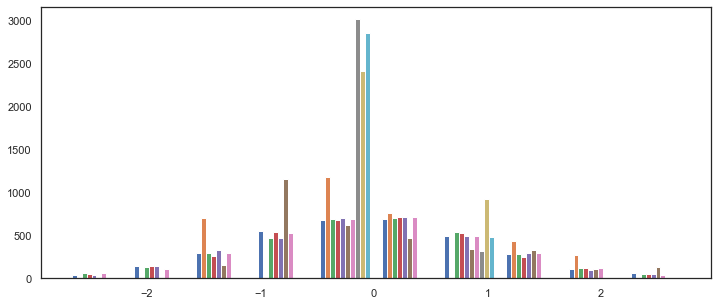

In [52]:
hist_plot(result_df)

### Data is Scaled and normally distributed

### Model Selection

#### 1. Logistic Regression
#### 2. Random Forest Classifier
#### 3. Decision Tree Classifier
#### 4. XGBoost Classifier
#### 5. KNeighbours Classifiers
#### 6. Naive Bayse Classifiers
#### 7. SVM Classifier

### Splitting the data in training and testing sets

In [53]:
# select independent variables
X = result_df.drop(columns='churn')

# select dependent variables
y = result_df.loc[:, 'churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['account_length', 'customer_service_calls', 'day_calls',
       'evening_calls', 'night_calls', 'international_calls', 'total_charge',
       'international_plan', 'voice_mail_plan'],
      dtype='object')
churn


In [54]:
# split the data in training and testing sets
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=40, shuffle=True)

In [55]:
X_train.shape

(2666, 9)

In [56]:
X_test.shape

(667, 9)

In [57]:
y_train.shape

(2666,)

In [58]:
y_test.shape

(667,)

In [59]:
#Checking the corelation of the new dataset
corrmat = np.corrcoef(X_train.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("Maximum correlation:",corrmat_nodiag.max(), ", Minimum correlation: ", corrmat_nodiag.min(),)

Maximum correlation: 0.0450064795919611 , Minimum correlation:  -0.037403598961729574


#### Savig Sample test data

In [60]:
inversed = scaler.inverse_transform(X_test.drop(columns=['international_plan','voice_mail_plan']))
sample_test_data = pd.DataFrame(inversed,columns=X_test.drop(columns=['international_plan','voice_mail_plan']).columns)
sample_test_data["voice_mail_plan"] = X_test["voice_mail_plan"].values.reshape(-1,1)
sample_test_data["international_plan"] = X_test["international_plan"].values.reshape(-1,1)
sample_test_data["churn"] = y_test.values.reshape(-1,1)
sample_test_data.set_index(sample_test_data.columns[0])
sample_test_data

,account_length,customer_service_calls,day_calls,evening_calls,night_calls,international_calls,total_charge,voice_mail_plan,international_plan,churn
0,84.00,0.00,96.00,94.00,70.00,7.00,49.50,0,0,0
1,107.00,1.00,95.00,85.00,87.00,3.00,36.70,0,0,0
2,206.50,0.00,106.00,109.00,93.00,3.00,63.18,0,0,1
3,10.00,2.00,112.00,66.00,57.00,6.00,63.62,0,0,0
4,122.00,3.50,99.00,89.00,107.00,3.00,77.76,0,0,1
...,...,...,...,...,...,...,...,...,...,...
662,32.00,2.00,98.00,96.00,108.00,2.00,59.09,0,0,0
663,55.00,2.00,121.00,110.00,136.00,7.00,63.53,0,0,0
664,153.00,1.00,90.00,121.00,108.00,3.00,60.07,0,0,0
665,128.00,1.00,84.00,95.00,68.00,5.00,66.88,0,0,0


In [61]:
sample_test_data.to_csv("sample_test_data.csv", encoding='utf-8',index=False)

### Model Building , Model Prediction & Model Evaluation

In [62]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate
import sys
class recursion_depth:
    def __init__(self, limit):
        self.limit = limit
        self.default_limit = sys.getrecursionlimit()

    def __enter__(self):
        sys.setrecursionlimit(self.limit)

    def __exit__(self, type, value, traceback):
        sys.setrecursionlimit(self.default_limit)
        
# ======================= #

def plot_confusion_matrix(y_test, y_pred):
#     # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                     index=['Predict Positive:1', 'Predict Negative:0'])

    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    TP = cm[0,0]
    TN = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    print("True Positives (Actual Positive:1 and Predict Positive:1) = ",TP)
    print("True Negatives (Actual Negative:0 and Predict Negative:0) = ",TN)
    print("False Positives (Actual Negative:0 but Predict Positive:1)(Type I error) = ",FP)
    print("False Negatives (Actual Positive:1 but Predict Negative:0) (Type II error)  = ",FN)
    
    return cm

def calculate_precision_recall_f1_score(y,y_pred):
    precision = round(precision_score(y, y_pred, average='binary'),2)
    print('Precision : {:.3f}'.format(precision))
    # recall
    recall = round(recall_score(y, y_pred, average='binary'),2)
    print('Recall or Sensitivity : {:.3f}'.format(recall))
    # f1_score
    f1 = round(f1_score(y, y_pred, average='binary'),2)
    print('F1_Score : {:.3f}'.format(f1))
    return precision,recall,f1
   

def calculate_ROC_AUC(y, y_pred):
    from sklearn.metrics import roc_auc_score
    ROC_AUC = round(roc_auc_score(y, y_pred),2)
    print('ROC AUC : {:.4f}'.format(ROC_AUC))
    return format(ROC_AUC)


def cross_validation(_title,_data_type,model, _X, _y, _cv=5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                           X=_X,
                           y=_y,
                           cv=_cv,
                           scoring=_scoring,
                           return_train_score=True)
    if _data_type=="Test":
        df = pd.DataFrame([
                   np.append(results['test_accuracy'],results['test_accuracy'].mean()),
                   np.append(results['test_precision'],results['test_precision'].mean()),
                   np.append(results['test_recall'],results['test_recall'].mean()),
                   np.append(results['test_f1'],results['test_f1'].mean())],
                   index=['Model Accuracy','Precision','Recall','F1_Score'],
                   columns=pd.MultiIndex.from_product([[_title],
                                ["Set 1","Set 2","Set 3","Set 4","Set 5","Set 6","Set 7","Set 8","Set 9","Set 10","Avg"]])
                 )
    else:
        df = pd.DataFrame([
                   np.append(results['train_accuracy'],results['train_accuracy'].mean()),
                   np.append(results['train_precision'],results['train_precision'].mean()),
                   np.append(results['train_recall'],results['train_recall'].mean()),
                   np.append(results['train_f1'],results['train_f1'].mean())],
                   index=['Model Accuracy','Precision','Recall','F1_Score'],
                   columns=pd.MultiIndex.from_product([[_title],
                                ["Set 1","Set 2","Set 3","Set 4","Set 5","Set 6","Set 7","Set 8","Set 9","Set 10","Avg"]])
                 )
    return df
def plot_learning_curve(model,X,y,_data_type,cv=10):
    train_sizes, train_scores, test_scores = learning_curve(model, 
                                                            X, y, cv=cv, 
                                                            scoring='accuracy', n_jobs=-1, 
                                                            train_sizes=np.linspace(0.01, 1.0, 50))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.subplots(1, figsize=(10,10))
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    return plt.show()

###  1. Logistic Regression

In [63]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [64]:
#Test Classification Report
y_pred = logreg.predict(X_test)
logreg_accuracy = round(accuracy_score(y_test, y_pred),2)
print(classification_report(y_test,y_pred )) 
print('Logistic Regression Test data accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       578
           1       0.60      0.24      0.34        89

    accuracy                           0.88       667
   macro avg       0.75      0.61      0.64       667
weighted avg       0.85      0.88      0.85       667

Logistic Regression Test data accuracy score with all the features: 0.8771


In [65]:
#Train Classification Report
y_train_pred = logreg.predict(X_train)
logreg_train_accuracy = round(accuracy_score(y_train, y_train_pred),2)
print(classification_report(y_train,y_train_pred )) 
print('Logistic Regression Train accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2272
           1       0.58      0.19      0.28       394

    accuracy                           0.86      2666
   macro avg       0.73      0.58      0.60      2666
weighted avg       0.83      0.86      0.83      2666

Logistic Regression Train accuracy score with all the features: 0.8601


#### K fold Cross-Validation

In [66]:
#For Test data
logreg_test_score = cross_validation('10-fold cross-validation for Test Data','Test',LogisticRegression(), X_test, y_test, 10)
logreg_test_score

10-fold cross-validation for Test Data                          \
                                                Set 1 Set 2 Set 3 Set 4 Set 5   
Model Accuracy                                   0.88  0.90  0.90  0.90  0.90   
Precision                                        0.67  0.75  1.00  1.00  1.00   
Recall                                           0.22  0.33  0.22  0.22  0.22   
F1_Score                                         0.33  0.46  0.36  0.36  0.36   

                                                    
               Set 6 Set 7 Set 8 Set 9 Set 10  Avg  
Model Accuracy  0.87  0.87  0.88  0.85   0.89 0.88  
Precision       0.50  0.50  0.50  0.40   1.00 0.73  
Recall          0.11  0.11  0.12  0.22   0.22 0.20  
F1_Score        0.18  0.18  0.20  0.29   0.36 0.31

In [67]:
#For Train data
logreg_train_score = cross_validation('10-fold cross-validation for Train Data','Train',LogisticRegression(), X_train, y_train, 10)
logreg_train_score

10-fold cross-validation for Train Data                    \
                                                 Set 1 Set 2 Set 3 Set 4   
Model Accuracy                                    0.86  0.86  0.86  0.86   
Precision                                         0.59  0.60  0.59  0.62   
Recall                                            0.18  0.19  0.18  0.21   
F1_Score                                          0.28  0.29  0.28  0.31   

                                                          
               Set 5 Set 6 Set 7 Set 8 Set 9 Set 10  Avg  
Model Accuracy  0.86  0.86  0.86  0.86  0.86   0.86 0.86  
Precision       0.58  0.61  0.61  0.59  0.61   0.61 0.60  
Recall          0.17  0.20  0.18  0.17  0.19   0.17 0.19  
F1_Score        0.26  0.31  0.27  0.27  0.29   0.27 0.28

<Figure size 1440x576 with 0 Axes>

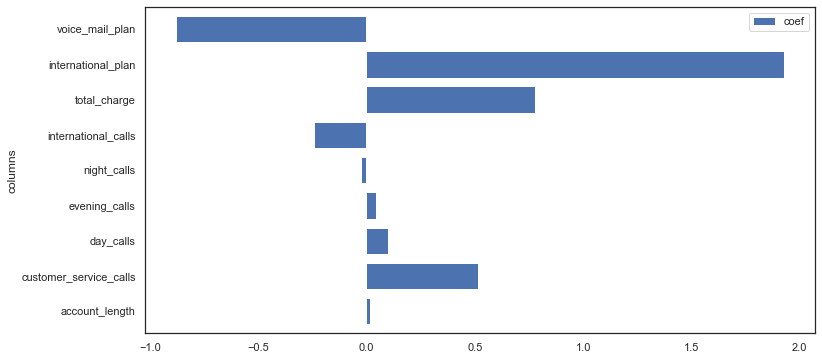

In [68]:
importance = logreg.coef_[0]
stats_data = pd.DataFrame({'columns':X.columns,'coef':importance})
# summarize feature importance
plt.figure(figsize=(20,8))
stats_data.plot(x='columns',kind='barh',width=0.75)
plt.show()

In [69]:
pd.DataFrame({'id':y_test.index,'y_test':y_test.to_numpy(), 'y_predicted':y_pred})

,id,y_test,y_predicted
0,1994,0,0
1,3078,0,0
2,1551,1,0
3,52,0,0
4,307,1,1
...,...,...,...
662,373,0,0
663,337,0,0
664,1205,0,0
665,760,0,0


True Positives (Actual Positive:1 and Predict Positive:1) =  564
True Negatives (Actual Negative:0 and Predict Negative:0) =  21
False Positives (Actual Negative:0 but Predict Positive:1)(Type I error) =  14
False Negatives (Actual Positive:1 but Predict Negative:0) (Type II error)  =  68


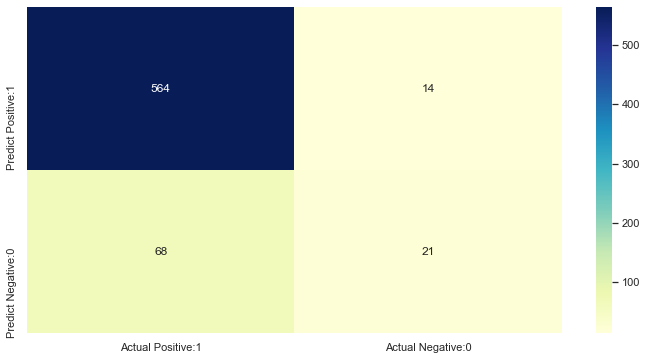

In [70]:
with recursion_depth(3000):
    cm = plot_confusion_matrix(y_test, y_pred)

In [71]:
# For Test data
logreg_precision,logreg_recall,logreg_f1_score = calculate_precision_recall_f1_score(y_test,y_pred)

Precision : 0.600
Recall or Sensitivity : 0.240
F1_Score : 0.340


In [72]:
# For Train data
logreg_train_precision,logreg_train_recall,logreg_train_f1_score = calculate_precision_recall_f1_score(y_train,y_train_pred)

Precision : 0.580
Recall or Sensitivity : 0.190
F1_Score : 0.280


In [73]:
#For Test data
logreg_ROC_AUC = calculate_ROC_AUC(y_test, y_pred)

ROC AUC : 0.6100


In [74]:
#For Train data
logreg_train_ROC_AUC = calculate_ROC_AUC(y_train, y_train_pred)

ROC AUC : 0.5800


### 2.Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier() 
classifier.fit(X_train, y_train) 

RandomForestClassifier()

In [76]:
y_pred = classifier.predict(X_test)
RF_accuracy = round(accuracy_score(y_test, y_pred),2)
print(classification_report(y_test,y_pred )) 
print('Random Forest Classifier Test accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       578
           1       0.99      0.80      0.88        89

    accuracy                           0.97       667
   macro avg       0.98      0.90      0.93       667
weighted avg       0.97      0.97      0.97       667

Random Forest Classifier Test accuracy score with all the features: 0.9715


In [77]:
y_train_pred = classifier.predict(X_train)
RF_train_accuracy = round(accuracy_score(y_train, y_train_pred),2)
print(classification_report(y_train,y_train_pred )) 
print('Random Forest Classifier Train accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2272
           1       1.00      1.00      1.00       394

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666

Random Forest Classifier Train accuracy score with all the features: 1.0000


#### K fold Cross-Validation

In [78]:
#For test data
RF_test_score = cross_validation('10-fold cross-validation for Test Data','Test',RandomForestClassifier(), X_test, y_test, 10)
RF_test_score

10-fold cross-validation for Test Data                          \
                                                Set 1 Set 2 Set 3 Set 4 Set 5   
Model Accuracy                                   0.97  1.00  0.94  0.97  0.97   
Precision                                        1.00  1.00  1.00  1.00  1.00   
Recall                                           0.78  1.00  0.56  0.78  0.78   
F1_Score                                         0.88  1.00  0.71  0.88  0.88   

                                                    
               Set 6 Set 7 Set 8 Set 9 Set 10  Avg  
Model Accuracy  0.96  0.99  0.98  0.98   0.94 0.97  
Precision       1.00  1.00  1.00  1.00   1.00 1.00  
Recall          0.67  0.89  0.88  0.89   0.56 0.78  
F1_Score        0.80  0.94  0.93  0.94   0.71 0.87

In [79]:
#For Train data
RF_train_score = cross_validation('10-fold cross-validation for Train Data','Train',RandomForestClassifier(), X_train, y_train, 10)
RF_train_score

10-fold cross-validation for Train Data                    \
                                                 Set 1 Set 2 Set 3 Set 4   
Model Accuracy                                    1.00  1.00  1.00  1.00   
Precision                                         1.00  1.00  1.00  1.00   
Recall                                            1.00  1.00  1.00  1.00   
F1_Score                                          1.00  1.00  1.00  1.00   

                                                          
               Set 5 Set 6 Set 7 Set 8 Set 9 Set 10  Avg  
Model Accuracy  1.00  1.00  1.00  1.00  1.00   1.00 1.00  
Precision       1.00  1.00  1.00  1.00  1.00   1.00 1.00  
Recall          1.00  1.00  1.00  1.00  1.00   1.00 1.00  
F1_Score        1.00  1.00  1.00  1.00  1.00   1.00 1.00

<AxesSubplot:>

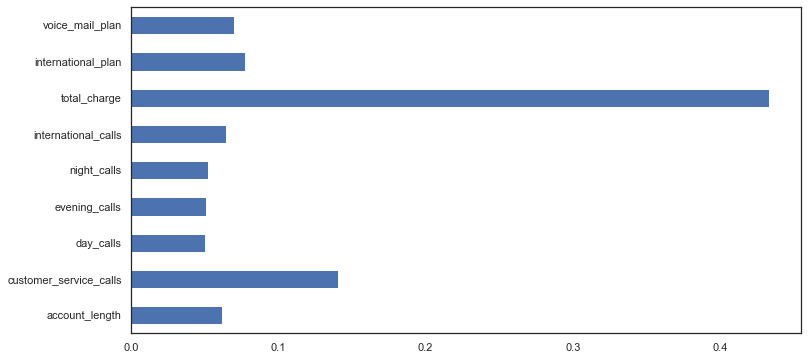

In [80]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

In [81]:
pd.DataFrame({'id':y_test.index,'y_test':y_test.to_numpy(), 'y_predicted':y_pred})

,id,y_test,y_predicted
0,1994,0,0
1,3078,0,0
2,1551,1,0
3,52,0,0
4,307,1,1
...,...,...,...
662,373,0,0
663,337,0,0
664,1205,0,0
665,760,0,0


True Positives (Actual Positive:1 and Predict Positive:1) =  577
True Negatives (Actual Negative:0 and Predict Negative:0) =  71
False Positives (Actual Negative:0 but Predict Positive:1)(Type I error) =  1
False Negatives (Actual Positive:1 but Predict Negative:0) (Type II error)  =  18


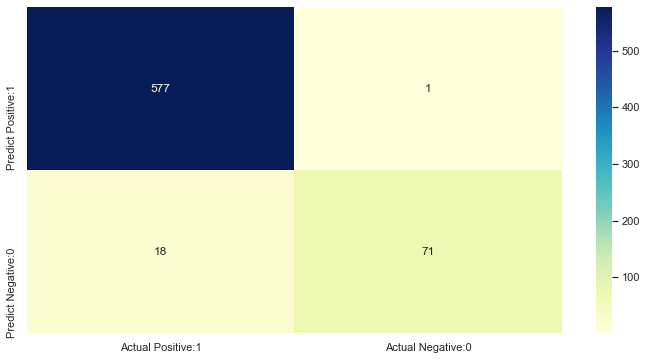

In [82]:
with recursion_depth(3000):
    cm = plot_confusion_matrix(y_test, y_pred)

In [83]:
#For Test data
RF_precision,RF_recall,RF_f1_score = calculate_precision_recall_f1_score(y_test,y_pred)

Precision : 0.990
Recall or Sensitivity : 0.800
F1_Score : 0.880


In [84]:
#For Train data
RF_train_precision,RF_train_recall,RF_train_f1_score = calculate_precision_recall_f1_score(y_train,y_train_pred)

Precision : 1.000
Recall or Sensitivity : 1.000
F1_Score : 1.000


In [85]:
#For Test data
RF_ROC_AUC = calculate_ROC_AUC(y_test, y_pred)

ROC AUC : 0.9000


In [86]:
#For Train data
RF_train_ROC_AUC = calculate_ROC_AUC(y_train, y_train_pred)

ROC AUC : 1.0000


### 3.Decision Tree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
DTmodel = DecisionTreeClassifier()
# fit the model
DTmodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
y_pred = DTmodel.predict(X_test)
DT_accuracy = round(accuracy_score(y_test, y_pred),2)
print(classification_report(y_test,y_pred )) 
print('Decision Tree Classifier Test accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       578
           1       0.72      0.80      0.76        89

    accuracy                           0.93       667
   macro avg       0.85      0.88      0.86       667
weighted avg       0.94      0.93      0.93       667

Decision Tree Classifier Test accuracy score with all the features: 0.9325


In [90]:
y_train_pred = DTmodel.predict(X_train)
DT_train_accuracy = round(accuracy_score(y_train, y_train_pred),2)
print(classification_report(y_train,y_train_pred )) 
print('Decision Tree Classifier Train accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2272
           1       1.00      1.00      1.00       394

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666

Decision Tree Classifier Train accuracy score with all the features: 1.0000


#### K fold Cross-Validation

In [91]:
#For test data
DT_test_score = cross_validation('10-fold cross-validation for Test Data','Test',DecisionTreeClassifier(), X_test, y_test, 10)
DT_test_score

10-fold cross-validation for Test Data                          \
                                                Set 1 Set 2 Set 3 Set 4 Set 5   
Model Accuracy                                   0.94  0.91  0.91  0.94  0.91   
Precision                                        0.86  0.60  0.71  0.78  0.62   
Recall                                           0.67  1.00  0.56  0.78  0.89   
F1_Score                                         0.75  0.75  0.63  0.78  0.73   

                                                    
               Set 6 Set 7 Set 8 Set 9 Set 10  Avg  
Model Accuracy  0.94  0.96  0.92  0.97   0.92 0.93  
Precision       0.86  0.80  0.67  0.82   0.83 0.75  
Recall          0.67  0.89  0.75  1.00   0.56 0.78  
F1_Score        0.75  0.84  0.71  0.90   0.67 0.75

In [92]:
#For Train data
DT_train_score = cross_validation('10-fold cross-validation for Train Data','Train',DecisionTreeClassifier(), X_train, y_train, 10)
DT_train_score

10-fold cross-validation for Train Data                    \
                                                 Set 1 Set 2 Set 3 Set 4   
Model Accuracy                                    1.00  1.00  1.00  1.00   
Precision                                         1.00  1.00  1.00  1.00   
Recall                                            1.00  1.00  1.00  1.00   
F1_Score                                          1.00  1.00  1.00  1.00   

                                                          
               Set 5 Set 6 Set 7 Set 8 Set 9 Set 10  Avg  
Model Accuracy  1.00  1.00  1.00  1.00  1.00   1.00 1.00  
Precision       1.00  1.00  1.00  1.00  1.00   1.00 1.00  
Recall          1.00  1.00  1.00  1.00  1.00   1.00 1.00  
F1_Score        1.00  1.00  1.00  1.00  1.00   1.00 1.00

<AxesSubplot:>

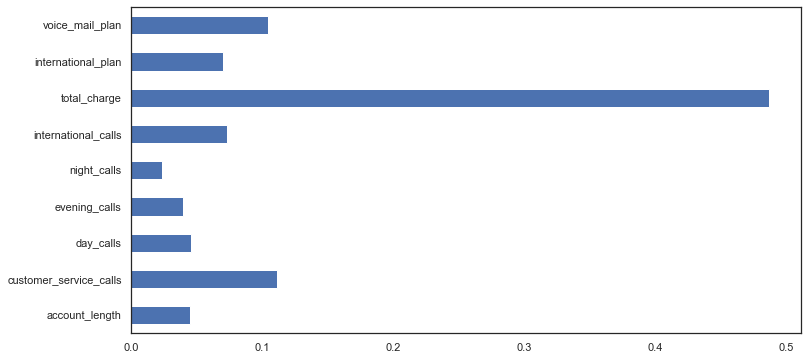

In [93]:
feat_importances = pd.Series(DTmodel.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

In [94]:
pd.DataFrame({'id':y_test.index,'y_test':y_test.to_numpy(), 'y_predicted':y_pred})

,id,y_test,y_predicted
0,1994,0,0
1,3078,0,0
2,1551,1,0
3,52,0,0
4,307,1,1
...,...,...,...
662,373,0,0
663,337,0,0
664,1205,0,0
665,760,0,0


True Positives (Actual Positive:1 and Predict Positive:1) =  551
True Negatives (Actual Negative:0 and Predict Negative:0) =  71
False Positives (Actual Negative:0 but Predict Positive:1)(Type I error) =  27
False Negatives (Actual Positive:1 but Predict Negative:0) (Type II error)  =  18


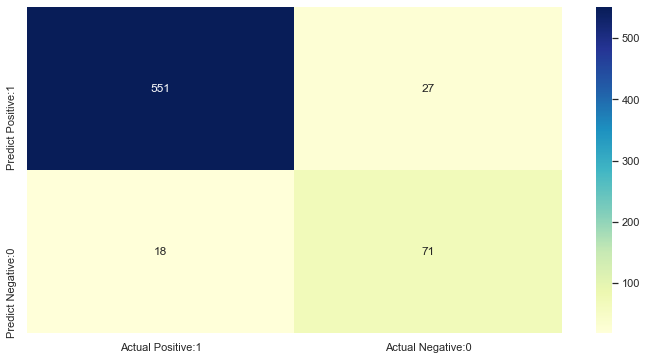

In [95]:
with recursion_depth(3000):
    cm = plot_confusion_matrix(y_test, y_pred)

In [96]:
#for Test data
DT_precision,DT_recall,DT_f1_score = calculate_precision_recall_f1_score(y_test,y_pred)

Precision : 0.720
Recall or Sensitivity : 0.800
F1_Score : 0.760


In [97]:
#For Train data
DT_train_precision,DT_train_recall,DT_train_f1_score = calculate_precision_recall_f1_score(y_train,y_train_pred)

Precision : 1.000
Recall or Sensitivity : 1.000
F1_Score : 1.000


In [98]:
DT_ROC_AUC = calculate_ROC_AUC(y_test, y_pred)

ROC AUC : 0.8800


In [99]:
DT_train_ROC_AUC = calculate_ROC_AUC(y_train, y_train_pred)

ROC AUC : 1.0000


### 4.XGBOOST Classifier

In [100]:
from xgboost import XGBClassifier

In [101]:
XGBmodel = XGBClassifier()
# fit the model
XGBmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [102]:
y_pred = XGBmodel.predict(X_test)
XGB_accuracy = round(accuracy_score(y_test, y_pred),2)
print(classification_report(y_test,y_pred )) 
print('XGBoost Calssifier Test accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       578
           1       0.96      0.80      0.87        89

    accuracy                           0.97       667
   macro avg       0.96      0.90      0.93       667
weighted avg       0.97      0.97      0.97       667

XGBoost Calssifier Test accuracy score with all the features: 0.9685


In [103]:
#For train
y_train_pred = XGBmodel.predict(X_train)
XGB_train_accuracy = round(accuracy_score(y_train, y_train_pred),2)
print(classification_report(y_train,y_train_pred )) 
print('XGBoost Calssifier Train accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2272
           1       1.00      1.00      1.00       394

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666

XGBoost Calssifier Train accuracy score with all the features: 1.0000


#### K fold Cross-Validation

In [104]:
#For test data
XGB_test_score = cross_validation('10-fold cross-validation for Test Data','Test',XGBClassifier(), X_test, y_test, 10)
XGB_test_score

10-fold cross-validation for Test Data                          \
                                                Set 1 Set 2 Set 3 Set 4 Set 5   
Model Accuracy                                   0.94  1.00  0.93  0.97  0.99   
Precision                                        0.86  1.00  1.00  1.00  1.00   
Recall                                           0.67  1.00  0.44  0.78  0.89   
F1_Score                                         0.75  1.00  0.62  0.88  0.94   

                                                    
               Set 6 Set 7 Set 8 Set 9 Set 10  Avg  
Model Accuracy  0.96  0.99  0.95  0.98   0.94 0.96  
Precision       1.00  1.00  0.86  1.00   1.00 0.97  
Recall          0.67  0.89  0.75  0.89   0.56 0.75  
F1_Score        0.80  0.94  0.80  0.94   0.71 0.84

In [105]:
#For Train data
XGB_train_score = cross_validation('10-fold cross-validation for Train Data','Train',XGBClassifier(), X_train, y_train, 10)
XGB_train_score

10-fold cross-validation for Train Data                    \
                                                 Set 1 Set 2 Set 3 Set 4   
Model Accuracy                                    1.00  1.00  1.00  1.00   
Precision                                         1.00  1.00  1.00  1.00   
Recall                                            1.00  1.00  1.00  1.00   
F1_Score                                          1.00  1.00  1.00  1.00   

                                                          
               Set 5 Set 6 Set 7 Set 8 Set 9 Set 10  Avg  
Model Accuracy  1.00  1.00  1.00  1.00  1.00   1.00 1.00  
Precision       1.00  1.00  1.00  1.00  1.00   1.00 1.00  
Recall          1.00  1.00  1.00  1.00  1.00   1.00 1.00  
F1_Score        1.00  1.00  1.00  1.00  1.00   1.00 1.00

<AxesSubplot:>

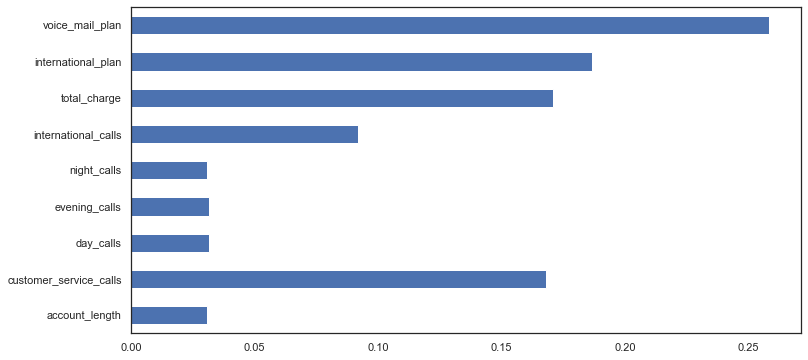

In [106]:
feat_importances = pd.Series(XGBmodel.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

In [107]:
pd.DataFrame({'id':y_test.index,'y_test':y_test.to_numpy(), 'y_predicted':y_pred})

,id,y_test,y_predicted
0,1994,0,0
1,3078,0,0
2,1551,1,0
3,52,0,0
4,307,1,1
...,...,...,...
662,373,0,0
663,337,0,0
664,1205,0,0
665,760,0,0


True Positives (Actual Positive:1 and Predict Positive:1) =  575
True Negatives (Actual Negative:0 and Predict Negative:0) =  71
False Positives (Actual Negative:0 but Predict Positive:1)(Type I error) =  3
False Negatives (Actual Positive:1 but Predict Negative:0) (Type II error)  =  18


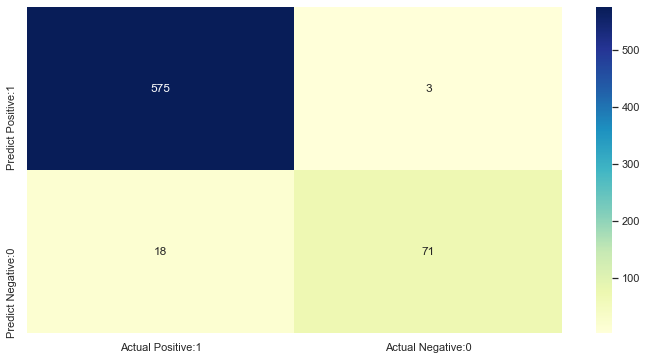

In [108]:
with recursion_depth(3000):
    cm = plot_confusion_matrix(y_test, y_pred)

In [109]:
XGBoost_precision,XGBoost_recall,XGBoost_f1_score = calculate_precision_recall_f1_score(y_test,y_pred)

Precision : 0.960
Recall or Sensitivity : 0.800
F1_Score : 0.870


In [110]:
#For train data
XGBoost_train_precision,XGBoost_train_recall,XGBoost_train_f1_score = calculate_precision_recall_f1_score(y_train,y_train_pred)

Precision : 1.000
Recall or Sensitivity : 1.000
F1_Score : 1.000


In [111]:
XGBoost_ROC_AUC = calculate_ROC_AUC(y_test, y_pred)

ROC AUC : 0.9000


In [112]:
XGBoost_train_ROC_AUC = calculate_ROC_AUC(y_train, y_train_pred)

ROC AUC : 1.0000


### 5.KNeighborsClassifier 

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [114]:
KNmodel = KNeighborsClassifier()
# fit the model
KNmodel.fit(X_train, y_train)

KNeighborsClassifier()

In [115]:
y_pred = KNmodel.predict(X_test)
KN_accuracy = round(accuracy_score(y_test, y_pred),2)
print(classification_report(y_test,y_pred )) 
print('KNeighbours Classifiers Test accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       578
           1       0.74      0.28      0.41        89

    accuracy                           0.89       667
   macro avg       0.82      0.63      0.67       667
weighted avg       0.88      0.89      0.87       667

KNeighbours Classifiers Test accuracy score with all the features: 0.8906


In [116]:
y_train_pred = KNmodel.predict(X_train)
KN_train_accuracy = round(accuracy_score(y_train, y_train_pred),2)
print(classification_report(y_train,y_train_pred )) 
print('KNeighbours Classifiers Train accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2272
           1       0.90      0.45      0.60       394

    accuracy                           0.91      2666
   macro avg       0.91      0.72      0.77      2666
weighted avg       0.91      0.91      0.90      2666

KNeighbours Classifiers Train accuracy score with all the features: 0.9111


#### K fold Cross-Validation

In [117]:
#For test data
KN_test_score = cross_validation('10-fold cross-validation for Test Data','Test',KNeighborsClassifier(), X_test, y_test, 10)
KN_test_score

10-fold cross-validation for Test Data                          \
                                                Set 1 Set 2 Set 3 Set 4 Set 5   
Model Accuracy                                   0.88  0.90  0.87  0.87  0.88   
Precision                                        1.00  1.00  0.50  0.00  1.00   
Recall                                           0.11  0.22  0.11  0.00  0.11   
F1_Score                                         0.20  0.36  0.18  0.00  0.20   

                                                    
               Set 6 Set 7 Set 8 Set 9 Set 10  Avg  
Model Accuracy  0.85  0.87  0.88  0.86   0.86 0.87  
Precision       0.33  0.00  0.50  0.50   0.00 0.48  
Recall          0.11  0.00  0.12  0.11   0.00 0.09  
F1_Score        0.17  0.00  0.20  0.18   0.00 0.15

In [118]:
#For test data
KN_train_score = cross_validation('10-fold cross-validation for Train Data','Train',KNeighborsClassifier(), X_train, y_train, 10)
KN_train_score

10-fold cross-validation for Train Data                    \
                                                 Set 1 Set 2 Set 3 Set 4   
Model Accuracy                                    0.91  0.91  0.91  0.91   
Precision                                         0.90  0.91  0.88  0.93   
Recall                                            0.43  0.44  0.44  0.44   
F1_Score                                          0.58  0.59  0.58  0.60   

                                                          
               Set 5 Set 6 Set 7 Set 8 Set 9 Set 10  Avg  
Model Accuracy  0.91  0.91  0.91  0.91  0.91   0.91 0.91  
Precision       0.90  0.89  0.90  0.89  0.89   0.91 0.90  
Recall          0.43  0.44  0.45  0.42  0.46   0.43 0.44  
F1_Score        0.58  0.59  0.60  0.57  0.61   0.58 0.59

<AxesSubplot:>

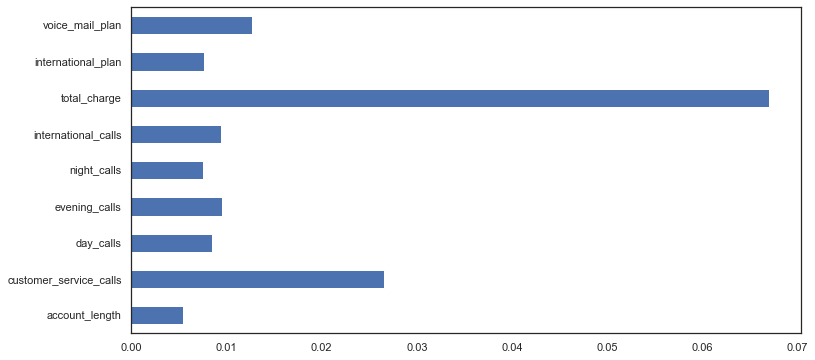

In [119]:
results = permutation_importance(KNmodel, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
feat_importances = pd.Series(importance, index=X.columns)
feat_importances.plot(kind='barh')

In [120]:
pd.DataFrame({'id':y_test.index,'y_test':y_test.to_numpy(), 'y_predicted':y_pred})

,id,y_test,y_predicted
0,1994,0,0
1,3078,0,0
2,1551,1,0
3,52,0,0
4,307,1,1
...,...,...,...
662,373,0,0
663,337,0,0
664,1205,0,0
665,760,0,0


True Positives (Actual Positive:1 and Predict Positive:1) =  569
True Negatives (Actual Negative:0 and Predict Negative:0) =  25
False Positives (Actual Negative:0 but Predict Positive:1)(Type I error) =  9
False Negatives (Actual Positive:1 but Predict Negative:0) (Type II error)  =  64


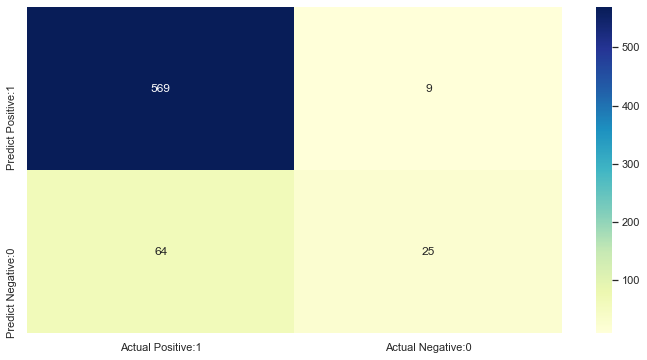

In [121]:
with recursion_depth(3000):
    cm = plot_confusion_matrix(y_test, y_pred)

In [122]:
KN_precision,KN_recall,KN_f1_score = calculate_precision_recall_f1_score(y_test,y_pred)

Precision : 0.740
Recall or Sensitivity : 0.280
F1_Score : 0.410


In [123]:
#For train Data
KN_train_precision,KN_train_recall,KN_train_f1_score = calculate_precision_recall_f1_score(y_train,y_train_pred)

Precision : 0.900
Recall or Sensitivity : 0.450
F1_Score : 0.600


In [124]:
KN_ROC_AUC = calculate_ROC_AUC(y_test, y_pred)

ROC AUC : 0.6300


In [125]:
#for train data
KN_train_ROC_AUC = calculate_ROC_AUC(y_train, y_train_pred)

ROC AUC : 0.7200


### 6.Naive Bayse Classifiers

In [126]:
from sklearn.naive_bayes import GaussianNB

In [127]:
naive_bayse_model = GaussianNB()
naive_bayse_model.fit(X_train, y_train)

GaussianNB()

In [128]:
y_pred = naive_bayse_model.predict(X_test)
Naive_Bayse_accuracy = round(accuracy_score(y_test, y_pred),2)
print(classification_report(y_test,y_pred )) 
print('Naive Bayse Classifiers Test accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       578
           1       0.47      0.38      0.42        89

    accuracy                           0.86       667
   macro avg       0.69      0.66      0.67       667
weighted avg       0.85      0.86      0.85       667

Naive Bayse Classifiers Test accuracy score with all the features: 0.8591


In [129]:
#For Train data
y_train_pred = naive_bayse_model.predict(X_train)
Naive_Bayse_train_accuracy = round(accuracy_score(y_train, y_train_pred),2)
print(classification_report(y_train,y_train_pred )) 
print('Naive Bayse Classifiers Train accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2272
           1       0.48      0.35      0.41       394

    accuracy                           0.85      2666
   macro avg       0.69      0.64      0.66      2666
weighted avg       0.83      0.85      0.84      2666

Naive Bayse Classifiers Train accuracy score with all the features: 0.8488


#### K fold Cross-Validation

In [130]:
#For test data
Naive_Bayse_test_score = cross_validation('10-fold cross-validation for Test Data','Test',GaussianNB(), X_test, y_test, 10)
Naive_Bayse_test_score

10-fold cross-validation for Test Data                          \
                                                Set 1 Set 2 Set 3 Set 4 Set 5   
Model Accuracy                                   0.85  0.85  0.84  0.84  0.90   
Precision                                        0.43  0.43  0.33  0.33  0.62   
Recall                                           0.33  0.33  0.22  0.22  0.56   
F1_Score                                         0.38  0.38  0.27  0.27  0.59   

                                                    
               Set 6 Set 7 Set 8 Set 9 Set 10  Avg  
Model Accuracy  0.85  0.85  0.85  0.88   0.88 0.86  
Precision       0.43  0.43  0.38  0.56   0.57 0.45  
Recall          0.33  0.33  0.38  0.56   0.44 0.37  
F1_Score        0.38  0.38  0.38  0.56   0.50 0.41

In [131]:
#For Train data
Naive_Bayse_train_score = cross_validation('10-fold cross-validation for Train Data','Train',GaussianNB(), X_train, y_train, 10)
Naive_Bayse_train_score

10-fold cross-validation for Train Data                    \
                                                 Set 1 Set 2 Set 3 Set 4   
Model Accuracy                                    0.85  0.85  0.85  0.85   
Precision                                         0.49  0.49  0.50  0.49   
Recall                                            0.37  0.35  0.36  0.36   
F1_Score                                          0.42  0.41  0.42  0.42   

                                                          
               Set 5 Set 6 Set 7 Set 8 Set 9 Set 10  Avg  
Model Accuracy  0.85  0.85  0.85  0.85  0.85   0.85 0.85  
Precision       0.48  0.50  0.48  0.48  0.48   0.48 0.49  
Recall          0.34  0.38  0.35  0.35  0.35   0.35 0.36  
F1_Score        0.40  0.43  0.41  0.41  0.40   0.40 0.41

<AxesSubplot:>

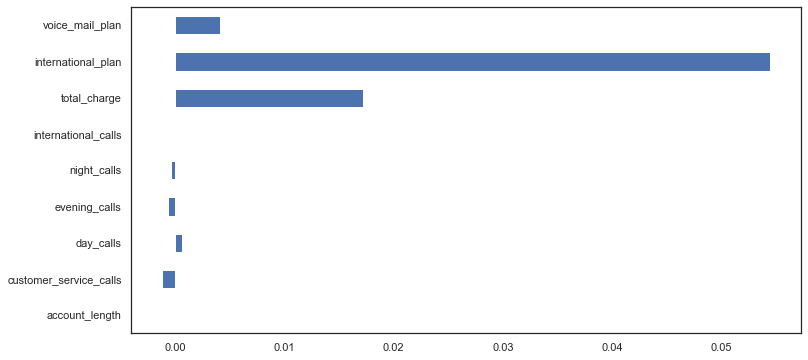

In [132]:
results = permutation_importance(naive_bayse_model, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
feat_importances = pd.Series(importance, index=X.columns)
feat_importances.plot(kind='barh')

In [133]:
pd.DataFrame({'id':y_test.index,'y_test':y_test.to_numpy(), 'y_predicted':y_pred})

,id,y_test,y_predicted
0,1994,0,0
1,3078,0,0
2,1551,1,0
3,52,0,0
4,307,1,1
...,...,...,...
662,373,0,0
663,337,0,0
664,1205,0,0
665,760,0,0


True Positives (Actual Positive:1 and Predict Positive:1) =  539
True Negatives (Actual Negative:0 and Predict Negative:0) =  34
False Positives (Actual Negative:0 but Predict Positive:1)(Type I error) =  39
False Negatives (Actual Positive:1 but Predict Negative:0) (Type II error)  =  55


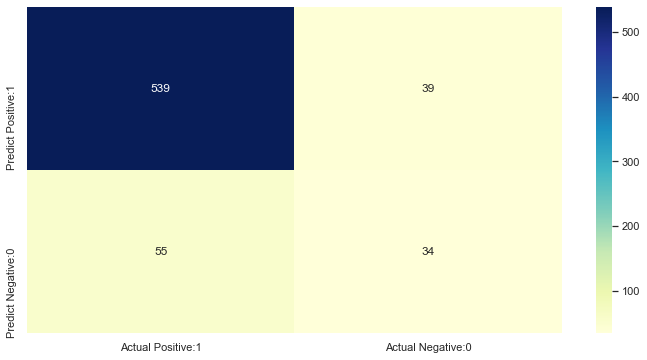

In [134]:
with recursion_depth(3000):
    cm = plot_confusion_matrix(y_test, y_pred)

In [135]:
Naive_Bayse_precision,Naive_Bayse_recall,Naive_Bayse_f1_score = calculate_precision_recall_f1_score(y_test,y_pred)

Precision : 0.470
Recall or Sensitivity : 0.380
F1_Score : 0.420


In [136]:
#For Train data
Naive_Bayse_train_precision,Naive_Bayse_train_recall,Naive_Bayse_train_f1_score = calculate_precision_recall_f1_score(y_train,y_train_pred)

Precision : 0.480
Recall or Sensitivity : 0.350
F1_Score : 0.410


In [137]:
# For Test data
Naive_Bayse_ROC_AUC = calculate_ROC_AUC(y_test, y_pred)

ROC AUC : 0.6600


In [138]:
#For train data
Naive_Bayse_train_ROC_AUC = calculate_ROC_AUC(y_train, y_train_pred)

ROC AUC : 0.6400


### 7. SVM Classifier

In [139]:
from sklearn.svm import SVC

In [140]:
SV_model = SVC() 
SV_model.fit(X_train, y_train)

SVC()

In [141]:
y_pred = SV_model.predict(X_test)
SVM_accuracy = round(accuracy_score(y_test, y_pred),2)
print(classification_report(y_test,y_pred )) 
print('SVM Classifiers Test accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       578
           1       0.76      0.31      0.44        89

    accuracy                           0.90       667
   macro avg       0.83      0.65      0.69       667
weighted avg       0.88      0.90      0.88       667

SVM Classifiers Test accuracy score with all the features: 0.8951


In [142]:
y_train_pred = SV_model.predict(X_train)
SVM_train_accuracy = round(accuracy_score(y_train, y_train_pred),2)
print(classification_report(y_train,y_train_pred )) 
print('SVM Classifiers Train accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2272
           1       0.95      0.50      0.66       394

    accuracy                           0.92      2666
   macro avg       0.94      0.75      0.81      2666
weighted avg       0.92      0.92      0.91      2666

SVM Classifiers Train accuracy score with all the features: 0.9224


#### K fold Cross-Validation

In [143]:
#For test data
SVM_test_score = cross_validation('10-fold cross-validation for Test Data','Test',SVC(), X_test, y_test, 10)
SVM_test_score

10-fold cross-validation for Test Data                          \
                                                Set 1 Set 2 Set 3 Set 4 Set 5   
Model Accuracy                                   0.88  0.90  0.90  0.87  0.85   
Precision                                        1.00  1.00  1.00  0.00  0.00   
Recall                                           0.11  0.22  0.22  0.00  0.00   
F1_Score                                         0.20  0.36  0.36  0.00  0.00   

                                                    
               Set 6 Set 7 Set 8 Set 9 Set 10  Avg  
Model Accuracy  0.87  0.87  0.88  0.88   0.86 0.87  
Precision       0.00  0.00  0.00  1.00   0.00 0.40  
Recall          0.00  0.00  0.00  0.11   0.00 0.07  
F1_Score        0.00  0.00  0.00  0.20   0.00 0.11

In [144]:
#For Train data
SVM_train_score = cross_validation('10-fold cross-validation for Train Data','Train',SVC(), X_train, y_train, 10)
SVM_train_score

10-fold cross-validation for Train Data                    \
                                                 Set 1 Set 2 Set 3 Set 4   
Model Accuracy                                    0.92  0.92  0.93  0.92   
Precision                                         0.95  0.95  0.94  0.98   
Recall                                            0.47  0.49  0.55  0.49   
F1_Score                                          0.63  0.65  0.69  0.66   

                                                          
               Set 5 Set 6 Set 7 Set 8 Set 9 Set 10  Avg  
Model Accuracy  0.92  0.93  0.92  0.92  0.92   0.92 0.92  
Precision       0.97  0.96  0.95  0.95  0.96   0.94 0.96  
Recall          0.49  0.51  0.48  0.47  0.46   0.50 0.49  
F1_Score        0.65  0.67  0.64  0.63  0.63   0.65 0.65

<AxesSubplot:>

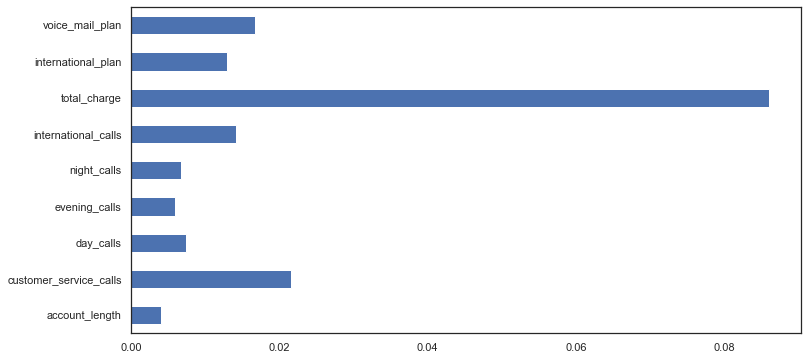

In [145]:
results = permutation_importance(SV_model, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
feat_importances = pd.Series(importance, index=X.columns)
feat_importances.plot(kind='barh')

In [146]:
pd.DataFrame({'id':y_test.index,'y_test':y_test.to_numpy(), 'y_predicted':y_pred})

,id,y_test,y_predicted
0,1994,0,0
1,3078,0,0
2,1551,1,0
3,52,0,0
4,307,1,0
...,...,...,...
662,373,0,0
663,337,0,0
664,1205,0,0
665,760,0,0


True Positives (Actual Positive:1 and Predict Positive:1) =  569
True Negatives (Actual Negative:0 and Predict Negative:0) =  28
False Positives (Actual Negative:0 but Predict Positive:1)(Type I error) =  9
False Negatives (Actual Positive:1 but Predict Negative:0) (Type II error)  =  61


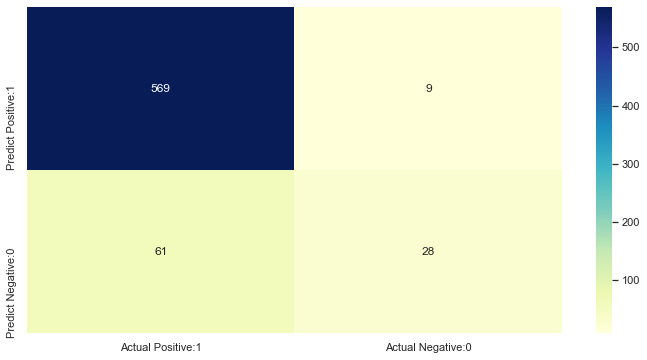

In [147]:
with recursion_depth(3000):
    cm = plot_confusion_matrix(y_test, y_pred)

In [148]:
SVM_precision,SVM_recall,SVM_f1_score = calculate_precision_recall_f1_score(y_test,y_pred)

Precision : 0.760
Recall or Sensitivity : 0.310
F1_Score : 0.440


In [149]:
#For train data
SVM_train_precision,SVM_train_recall,SVM_train_f1_score = calculate_precision_recall_f1_score(y_train,y_train_pred)

Precision : 0.950
Recall or Sensitivity : 0.500
F1_Score : 0.660


In [150]:
SVM_ROC_AUC = calculate_ROC_AUC(y_test, y_pred)

ROC AUC : 0.6500


In [151]:
SVM_train_ROC_AUC = calculate_ROC_AUC(y_train, y_train_pred)

ROC AUC : 0.7500


In [152]:
data = [[logreg_train_accuracy*100,logreg_accuracy*100,logreg_train_precision,logreg_precision,logreg_train_recall,logreg_recall,logreg_train_f1_score,logreg_f1_score,logreg_train_ROC_AUC,logreg_ROC_AUC], 
        [RF_train_accuracy*100,RF_accuracy*100,RF_train_precision,RF_precision,RF_train_recall,RF_recall,RF_train_f1_score,RF_f1_score,RF_train_ROC_AUC,RF_ROC_AUC],
        [DT_train_accuracy*100,DT_accuracy*100,DT_train_precision,DT_precision,DT_train_recall,DT_recall,DT_train_f1_score,DT_f1_score,DT_train_ROC_AUC,DT_ROC_AUC],
        [XGB_train_accuracy*100,XGB_accuracy*100,XGBoost_train_precision,XGBoost_precision,XGBoost_train_recall,XGBoost_recall,XGBoost_train_f1_score,XGBoost_f1_score,XGBoost_train_ROC_AUC,XGBoost_ROC_AUC],
        [KN_train_accuracy*100,KN_accuracy*100,KN_train_precision,KN_precision,KN_train_recall,KN_recall,KN_train_f1_score,KN_f1_score,KN_train_ROC_AUC,KN_ROC_AUC],
        [Naive_Bayse_train_accuracy*100,Naive_Bayse_accuracy*100,Naive_Bayse_train_precision,Naive_Bayse_precision,Naive_Bayse_train_recall,Naive_Bayse_recall,Naive_Bayse_train_f1_score,Naive_Bayse_f1_score,Naive_Bayse_train_ROC_AUC,Naive_Bayse_ROC_AUC],
        [SVM_train_accuracy*100,SVM_accuracy*100,SVM_train_precision,SVM_precision,SVM_train_recall,SVM_recall,SVM_train_f1_score,SVM_f1_score,SVM_train_ROC_AUC,SVM_ROC_AUC]]

df = pd.DataFrame(data,
                  index=['Logistic Regression',
                               'Random Forest Classifier',
                               'Decision Tree Classifier',
                               'XGBoost Classifier',
                               'KNeighbors Classifier',
                               'Naive Bayse Classifier',
                               'SVM Classifier'                                                     
                                            ],
                   columns=pd.MultiIndex.from_product([['Model Accuracy','Precision','Recall','F1_Score','ROC_AUC'],['Train', 'Test']])
                 )

print("Matrix for Train Data('80%') / Test Data('20%')")
df

Matrix for Train Data('80%') / Test Data('20%')


Model Accuracy       Precision      Recall       \
                                  Train  Test     Train Test  Train Test   
Logistic Regression               86.00 88.00      0.58 0.60   0.19 0.24   
Random Forest Classifier         100.00 97.00      1.00 0.99   1.00 0.80   
Decision Tree Classifier         100.00 93.00      1.00 0.72   1.00 0.80   
XGBoost Classifier               100.00 97.00      1.00 0.96   1.00 0.80   
KNeighbors Classifier             91.00 89.00      0.90 0.74   0.45 0.28   
Naive Bayse Classifier            85.00 86.00      0.48 0.47   0.35 0.38   
SVM Classifier                    92.00 90.00      0.95 0.76   0.50 0.31   

                         F1_Score      ROC_AUC        
                            Train Test   Train  Test  
Logistic Regression          0.28 0.34    0.58  0.61  
Random Forest Classifier     1.00 0.88     1.0   0.9  
Decision Tree Classifier     1.00 0.76     1.0  0.88  
XGBoost Classifier           1.00 0.87     1.0   0.9  
KNeighbors Classifier        0.60 0.41    0.72  0.63  
Naive Bayse Classifier       0.41 0.42    0.64  0.66  
SVM Classifier               0.66 0.44    0.75  0.65

###  Random forest Classifier is the best model

### Model Optimization - Hyperparameter Tuning  - GridSearchCV

In [179]:
from sklearn.model_selection import validation_curve,GridSearchCV
from sklearn.pipeline import make_pipeline
pipelineRFC = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='gini', random_state=1))
#

param_grid_rfc = [{
    'randomforestclassifier__max_depth':[2, 3, 4,5,6],
    'randomforestclassifier__max_features':[2, 3, 4, 5, 6,7,8,9],
    'randomforestclassifier__n_estimators':[2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]
}]
#
# Create an instance of GridSearch Cross-validation estimator
#
gsRFC = GridSearchCV(estimator=pipelineRFC,
                     param_grid = param_grid_rfc,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the RandomForestClassifier
#
gsRFC = gsRFC.fit(X_train, y_train)
#
# Print the training score of the best model
#
print(gsRFC.best_score_)
#
# Print the model parameters of the best model
#
print(gsRFC.best_params_)
#
# Print the test score of the best model
#
clfRFC = gsRFC.best_estimator_
print('Test accuracy: %.3f' % clfRFC.score(X_test, y_test))

0.9636211314803864
{'randomforestclassifier__max_depth': 4, 'randomforestclassifier__max_features': 8, 'randomforestclassifier__n_estimators': 6}
Test accuracy: 0.970


### Applying Best Parameters

In [180]:

finalized_model = RandomForestClassifier(random_state = 1, bootstrap=False, max_depth= 4, max_features= 8, n_estimators=6)

In [181]:

finalized_model.fit(X_train, y_train)
y_pred = finalized_model.predict(X_test)

In [182]:
print(classification_report(y_test,y_pred )) 
print('Classifiers Test accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       578
           1       1.00      0.78      0.87        89

    accuracy                           0.97       667
   macro avg       0.98      0.89      0.93       667
weighted avg       0.97      0.97      0.97       667

Classifiers Test accuracy score with all the features: 0.9700


#### K fold Cross-Validation

In [183]:
finalized_model_test_score = cross_validation('10-fold cross-validation for Test Data','Test',RandomForestClassifier(random_state = 1, max_depth = 4,     
                                        max_features=8), X_test, y_test, 10)
finalized_model_test_score

10-fold cross-validation for Test Data                          \
                                                Set 1 Set 2 Set 3 Set 4 Set 5   
Model Accuracy                                   0.96  0.99  0.94  0.97  0.99   
Precision                                        1.00  0.90  1.00  1.00  1.00   
Recall                                           0.67  1.00  0.56  0.78  0.89   
F1_Score                                         0.80  0.95  0.71  0.88  0.94   

                                                    
               Set 6 Set 7 Set 8 Set 9 Set 10  Avg  
Model Accuracy  0.96  0.99  0.97  0.98   0.94 0.97  
Precision       1.00  1.00  1.00  1.00   1.00 0.99  
Recall          0.67  0.89  0.75  0.89   0.56 0.76  
F1_Score        0.80  0.94  0.86  0.94   0.71 0.85

True Positives (Actual Positive:1 and Predict Positive:1) =  578
True Negatives (Actual Negative:0 and Predict Negative:0) =  69
False Positives (Actual Negative:0 but Predict Positive:1)(Type I error) =  0
False Negatives (Actual Positive:1 but Predict Negative:0) (Type II error)  =  20


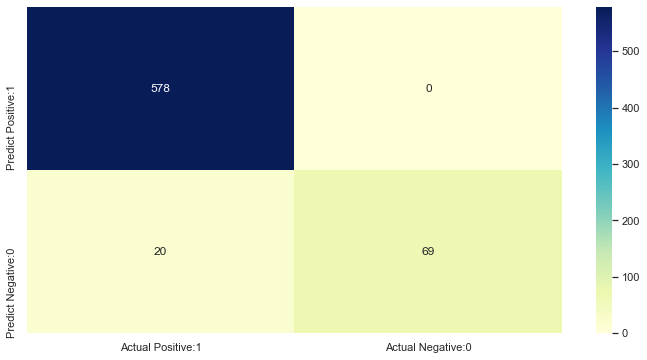

In [184]:
with recursion_depth(3000):
    cm = plot_confusion_matrix(y_test, y_pred)

In [185]:
pd.DataFrame({'id':y_test.index,'y_test':y_test.to_numpy(), 'y_predicted':y_pred})

,id,y_test,y_predicted
0,1994,0,0
1,3078,0,0
2,1551,1,0
3,52,0,0
4,307,1,1
...,...,...,...
662,373,0,0
663,337,0,0
664,1205,0,0
665,760,0,0


### Saving best model 

In [186]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(finalized_model, filename)

['finalized_model.sav']